<a href="https://colab.research.google.com/github/mindjobs/Ecerlab/blob/main/Trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LABORATORIO 1: EDA y Pipeline Reproducible con datos clínicos oncológicos (cBioPortal)

Integrantes:
- Cristian Vargas
- Claudio Ballerini
- Christian Vásquez
- Juan José Torres

Replicar el enfoque del tutorial visto en clase con datos de cBioPortal, pero sobre un nuevo set
clínico oncológico elegido por tu equipo. El objetivo es evaluar la calidad/estructura del dataset,
construir un pipeline reproducible y documentar el flujo de trabajo con buenas prácticas.
Trabajo en grupo.

## Introducción y Configuración del Entorno

In [2]:
!pip install pandas

import pandas as pd

# Leer el archivo delimitado por tabulaciones en un DataFrame
df = pd.read_csv('data_limpia_trabajo_final.csv')
display(df.head())

/tmp/ipython-input-3650832972.py:6: DtypeWarning: Columns (24,25,26,27,28,29,30,31,32,33,47,51,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_limpia_trabajo_final.csv')


,COD_HOSPITAL,ID_BENEFICIARIO,SEXO,FECHA_NACIMIENTO,ETNIA,PROVINCIA,COMUNA,NACIONALIDAD,PREVISION,SERVICIO_SALUD,...,ESPECIALIDADINTERVENCION,MEDICOALTA_ENCRIPTADO,USOSPABELLON,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,HOSPPROCEDENCIA,corr,ESTADO
0,111100,96596863,MUJER,1987-06-13,OTRO,SANTIAGO,SANTIAGO,VENEZUELA (REPÚBLICA BOLIVARIANA DE),FONASA INSTITUCIONAL - (MAI) D,METROPOLITANO CENTRAL,...,MATRONAS(ES),71551680.0,1.0,146131.0,"0,2987",1.0,1.0,NaN,O98.3-B95.1-O24.4-O80.0-Z37.0-Z38.0-----------...,EMBARAZADA
1,107102,71864179,MUJER,1982-08-20,OTRO,MARGA MARGA,QUILPUE,CHILE,FONASA INSTITUCIONAL - (MAI) A,VIÑA DEL MAR QUILLOTA,...,MATRONAS(ES),96949816.0,1.0,146131.0,"0,2987",1.0,1.0,NaN,O24.4-O99.5-E66.8-O80.0-Z82.4-Z37.0-Z38.0-----...,EMBARAZADA
2,113180,77766516,MUJER,1989-08-13,OTRO,MAIPO,SAN BERNARDO,CHILE,FONASA LIBRE ELECCIÓN (FMLE_D),METROPOLITANO SUR,...,OBSTETRICIA Y GINECOLOGÍA,98195470.0,1.0,146101.0,"0,5155",1.0,1.0,NaN,O34.2-O82.0-Z37.0-Z38.0-Z39.0-Z39.1-Z39.2-----...,EMBARAZADA
3,103100,98291056,MUJER,2002-04-29,OTRO,ANTOFAGASTA,ANTOFAGASTA,BOLIVIA (ESTADO PLURINACIONAL DE),FONASA INSTITUCIONAL - (MAI) A,ANTOFAGASTA,...,MATRONAS(ES),96997257.0,1.0,146131.0,"0,2987",1.0,1.0,NaN,O80.0-Z37.0-Z35.3--------------------------------,EMBARAZADA
4,116100,70882592,MUJER,1999-08-06,OTRO,CURICO,TENO,CHILE,FONASA INSTITUCIONAL - (MAI) B,DEL MAULE,...,MATRONAS(ES),97406738.0,3.0,146121.0,"0,3109",1.0,1.0,NaN,O80.0-Z37.0-O70.0-O99.2-O36.0-----------------...,EMBARAZADA


# Tarea
Realizar una auditoría de calidad de datos sobre el DataFrame df leído desde el archivo delimitado por tabulaciones "file.txt".
La auditoría debe incluir:

* Verificación de valores nulos
* Detección de filas duplicadas
* Revisión de tipos de datos
* Estadísticas descriptivas
* Conteo de valores únicos
* Visualizaciones de problemas de calidad de datos
* Finalmente, se debe generar un informe que resuma los hallazgos.

# Tarea
Realizar una auditoría de calidad de datos en el dataframe `df` que fue leído desde un archivo delimitado por tabulaciones.

## Verificar valores faltantes

### Subtarea:
Contar el número de valores faltantes en cada columna.


**Razonamiento**:
Calcular y mostrar el número de valores faltantes por columna.



In [ ]:
# Contar los valores faltantes en cada columna
missing_values = df.isnull().sum()
print(missing_values)
df.info()

COD_HOSPITAL              0
ID_BENEFICIARIO           1
SEXO                      0
FECHA_NACIMIENTO          0
ETNIA                     0
                       ... 
IR_29301_SEVERIDAD        1
IR_29301_MORTALIDAD       1
HOSPPROCEDENCIA        4906
corr                      1
ESTADO                    1
Length: 131, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Columns: 131 entries, COD_HOSPITAL to ESTADO
dtypes: float64(57), int64(1), object(73)
memory usage: 5.4+ MB


## Verificar filas duplicadas

### Subtarea:
Identificar y contar filas duplicadas en el dataframe.


**Razonamiento**:
Identificar y contar las filas duplicadas en el DataFrame.



In [ ]:
# Contar las filas duplicadas
duplicate_rows = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicate_rows}")

Número de filas duplicadas: 0


## Verificar tipos de datos

### Subtarea:
Verificar los tipos de datos de cada columna e identificar inconsistencias.


**Razonamiento**:
Mostrar los tipos de datos de cada columna para identificar inconsistencias.



In [ ]:
# Mostrar los tipos de datos de cada columna
print(df.dtypes)

COD_HOSPITAL             int64
ID_BENEFICIARIO         object
SEXO                    object
FECHA_NACIMIENTO        object
ETNIA                   object
                        ...   
IR_29301_SEVERIDAD     float64
IR_29301_MORTALIDAD    float64
HOSPPROCEDENCIA         object
corr                    object
ESTADO                  object
Length: 131, dtype: object


## Generar estadísticas descriptivas

### Subtarea:
Calcular estadísticas descriptivas para columnas numéricas y categóricas para comprender la distribución de los datos y posibles valores atípicos.


**Razonamiento**:
Generar y mostrar estadísticas descriptivas tanto para columnas numéricas como categóricas, con el fin de comprender la distribución de los datos y detectar posibles outliers.



In [ ]:
# Generar y mostrar estadísticas descriptivas para columnas numéricas
print("Estadísticas Descriptivas para Columnas Numéricas:")
display(df.describe())

# Generar y mostrar estadísticas descriptivas para columnas categóricas
print("\nEstadísticas Descriptivas para Columnas Categóricas:")
display(df.describe(include='object'))

Estadísticas Descriptivas para Columnas Numéricas:


,COD_HOSPITAL,FECHATRASLADO7,SERVICIOTRASLADO7,FECHATRASLADO8,SERVICIOTRASLADO8,FECHATRASLADO9,SERVICIOTRASLADO9,PESORN1,RN1ESTADO,PESORN2,...,PROCEDIMIENTO28,PROCEDIMIENTO29,PROCEDIMIENTO30,MEDICOINTERV1_ENCRIPTADO,FECHAPROCEDIMIENTO1,MEDICOALTA_ENCRIPTADO,USOSPABELLON,IR_29301_COD_GRD,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD
count,5397.000000,0.0,0.0,0.0,0.0,0.0,0.0,3701.000000,4093.000000,61.000000,...,7.000000,6.000000,6.000000,3.980000e+03,0.0,5.396000e+03,3668.000000,5396.000000,5396.000000,5396.000000
mean,113267.766908,NaN,NaN,NaN,NaN,NaN,NaN,3243.104837,8.177376,2169.377049,...,80.755714,93.961667,77.165000,5.564448e+07,NaN,5.712201e+07,1.139858,141400.616568,1.357858,1.050778
std,6734.571990,NaN,NaN,NaN,NaN,NaN,NaN,627.330401,2.860526,626.997745,...,35.755386,4.821367,37.904008,3.871775e+07,NaN,3.946488e+07,0.547512,11558.263505,0.603047,0.251072
min,101100.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,680.000000,...,0.170000,89.040000,0.170000,1.400000e+01,NaN,2.000000e+00,0.000000,11131.000000,0.000000,0.000000
25%,109100.000000,NaN,NaN,NaN,NaN,NaN,NaN,2960.000000,9.000000,1800.000000,...,89.655000,89.787500,89.075000,1.080125e+04,NaN,1.589800e+04,1.000000,134161.000000,1.000000,1.000000
50%,113150.000000,NaN,NaN,NaN,NaN,NaN,NaN,3305.000000,9.000000,2320.000000,...,93.180000,93.330000,90.435000,7.452507e+07,NaN,7.519353e+07,1.000000,146101.000000,1.000000,1.000000
75%,117101.000000,NaN,NaN,NaN,NaN,NaN,NaN,3630.000000,9.000000,2590.000000,...,96.700000,98.462500,93.197500,8.333802e+07,NaN,8.605464e+07,1.000000,146121.000000,2.000000,1.000000
max,133150.000000,NaN,NaN,NaN,NaN,NaN,NaN,5590.000000,11.000000,3660.000000,...,99.230000,99.290000,99.210000,1.022153e+08,NaN,1.022114e+08,5.000000,224122.000000,3.000000,3.000000



Estadísticas Descriptivas para Columnas Categóricas:


,ID_BENEFICIARIO,SEXO,FECHA_NACIMIENTO,ETNIA,PROVINCIA,COMUNA,NACIONALIDAD,PREVISION,SERVICIO_SALUD,TIPO_PROCEDENCIA,...,DIAGNOSTICO29,DIAGNOSTICO30,DIAGNOSTICO31,DIAGNOSTICO32,FECHAINTERV1,ESPECIALIDADINTERVENCION,IR_29301_PESO,HOSPPROCEDENCIA,corr,ESTADO
count,5396,5397,5397,5397,5397,5397,5397,5397,5397,5397,...,1,1,1,1,2852,3959,5396,491,5396,5396
unique,5356,1,3979,12,55,301,29,13,29,12,...,1,1,1,1,1543,13,123,133,4480,2
top,SIN INFORMACIÓN,MUJER,1995-12-12,NINGUNO,SANTIAGO,PUENTE ALTO,CHILE,FONASA INSTITUCIONAL - (MAI) B,METROPOLITANO SURORIENTE,SERVICIO EMERGENCIA (DOMICILIO),...,Z88.0,T85.8,Y84.0,I82.8,DESCONOCIDA,OBSTETRICIA Y GINECOLOGÍA,"0,5155",HOSPITAL SAN PABLO (COQUIMBO),O80.0-Z37.0---------------------------------,EMBARAZADA
freq,17,5397,5,2952,1393,185,4387,1799,459,3686,...,1,1,1,1,21,2642,789,75,104,5388


## Identificar valores únicos

### Subtarea:
Enumerar los valores únicos en columnas categóricas para verificar inconsistencias o variaciones.


**Razonamiento**:
Recorrer cada columna, verificar si su tipo de dato es object y, en ese caso, mostrar los valores únicos.



In [ ]:
# Iterar a través de cada columna, verificar si es de tipo 'object' (categórica) e imprimir los valores únicos
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"Valores únicos para la columna '{col}':")
    print(df[col].unique())
    print("-" * 30)

Valores únicos para la columna 'ID_BENEFICIARIO':
['96596863' '71864179' '77766516' ... '991374' '542503' '1276094']
------------------------------
Valores únicos para la columna 'SEXO':
['MUJER']
------------------------------
Valores únicos para la columna 'FECHA_NACIMIENTO':
['1987-06-13' '1982-08-20' '1989-08-13' ... '1997-04-08' '1997-05-20'
 '1982-06-16']
------------------------------
Valores únicos para la columna 'ETNIA':
['OTRO' 'MAPUCHE' 'AYMARA' 'QUECHUA' 'RAPA NUI (PASCUENSE)' 'NINGUNO'
 'OTRO ' 'NINGUNA' 'LICAN ANTAI (ATACAMEÑO)' 'DIAGUITA' 'KAWÉSQAR'
 'YAGÁN (YÁMANA)']
------------------------------
Valores únicos para la columna 'PROVINCIA':
['SANTIAGO' 'MARGA MARGA' 'MAIPO' 'ANTOFAGASTA' 'CURICO' 'ELQUI'
 'TALAGANTE' 'LIMARI' 'VALPARAISO' 'TALCA' 'CAUTIN' 'CORDILLERA'
 'SAN FELIPE' 'MAGALLANES' 'DIGUILLÍN' 'OSORNO' 'IQUIQUE' 'MALLECO'
 'LINARES' 'BIO-BIO' 'CHILOE' 'COLCHAGUA' 'HUASCO' 'EL LOA' 'QUILLOTA'
 'CACHAPOAL' 'ARICA' 'LLANQUIHUE' 'SAN ANTONIO' 'CONCEPCION' 'VAL

## Visualizar problemas de calidad de datos

### Subtarea:
Crear visualizaciones para representar valores faltantes, valores atípicos u otros problemas de calidad de datos.


In [3]:
# Load and inspect the uploaded dataset
import pandas as pd, numpy as np, re, os, textwrap, json


summary = {
    "rows": len(df),
    "cols": df.shape[1],
    "columns": df.columns.tolist()[:50],  # show first 50 column names
}

# Peek a few rows
head = df.head(10)

# Try to detect likely ID, sex, age, date, diagnosis code columns heuristically
colnames_lower = {c.lower(): c for c in df.columns}
patterns = {
    "id_persona": [r"id_?persona", r"id_?paciente", r"rut", r"run", r"id_?madre", r"id_?hijo", r"id"],
    "sexo": [r"sexo", r"genero"],
    "edad": [r"edad", r"age"],
    "fec_nac": [r"fec.*nac", r"fecha.*nac", r"nacimiento"],
    "fec_evento": [r"fec", r"fecha"],
    "diag": [r"cie10", r"codigo.*cie", r"cie_?10", r"diagnost", r"dx", r"cod.*diag"],
    "relacion": [r"madre", r"gest", r"embar", r"neonato", r"hijo"]
}

detected = {}
for key, pats in patterns.items():
    found = []
    for c in df.columns:
        cl = c.lower()
        if any(re.search(p, cl) for p in pats):
            found.append(c)
    detected[key] = found

# Try to infer ICD-10-like columns (C00–C97 cancers, O, P blocks etc. if present as codes)
possible_code_cols = [c for c in df.columns if re.search(r"(cie|dx|diag|cod)", c, re.I)]
sample_codes = {}
for c in possible_code_cols[:10]:  # sample a few columns
    vals = df[c].dropna().astype(str).head(20).tolist()
    sample_codes[c] = vals

# Basic missingness
missing_pct = df.isna().mean().sort_values(ascending=False).head(20)

summary, detected, list(sample_codes.items())[:5], missing_pct.head(10)

({'rows': 349254,
  'cols': 131,
  'columns': ['COD_HOSPITAL',
   'ID_BENEFICIARIO',
   'SEXO',
   'FECHA_NACIMIENTO',
   'ETNIA',
   'PROVINCIA',
   'COMUNA',
   'NACIONALIDAD',
   'PREVISION',
   'SERVICIO_SALUD',
   'TIPO_PROCEDENCIA',
   'TIPO_INGRESO',
   'ESPECIALIDAD_MEDICA',
   'TIPO_ACTIVIDAD',
   'FECHA_INGRESO',
   'SERVICIOINGRESO',
   'FECHATRASLADO1',
   'SERVICIOTRASLADO1',
   'FECHATRASLADO2',
   'SERVICIOTRASLADO2',
   'FECHATRASLADO3',
   'SERVICIOTRASLADO3',
   'FECHATRASLADO4',
   'SERVICIOTRASLADO4',
   'FECHATRASLADO5',
   'SERVICIOTRASLADO5',
   'FECHATRASLADO6',
   'SERVICIOTRASLADO6',
   'FECHATRASLADO7',
   'SERVICIOTRASLADO7',
   'FECHATRASLADO8',
   'SERVICIOTRASLADO8',
   'FECHATRASLADO9',
   'SERVICIOTRASLADO9',
   'FECHAALTA',
   'SERVICIOALTA',
   'TIPOALTA',
   'CONDICIONDEALTANEONATO1',
   'PESORN1',
   'SEXORN1',
   'RN1ESTADO',
   'CONDICIONDEALTANEONATO2',
   'PESORN2',
   'SEXORN2',
   'RN2ESTADO',
   'CONDICIONDEALTANEONATO3',
   'PESORN3',
   'SE

In [4]:
import pandas as pd, re, numpy as np

cols = df.columns
targets = {
    "peso_cols": [c for c in cols if re.search(r"peso.*rn|peso.?nac", c, re.I)],
    "semana_cols": [c for c in cols if re.search(r"seman", c, re.I)],
    "apgar_cols": [c for c in cols if re.search(r"apgar", c, re.I)],
    "cond_neonato": [c for c in cols if re.search(r"condicion.*neonato|egreso.*neonato|alta.*neonato", c, re.I)],
    "uci_cols": [c for c in cols if re.search(r"uci|uti|neonat", c, re.I)],
    "parto_cols": [c for c in cols if re.search(r"parto|cesarea|aborto", c, re.I)],
    "madre_cols": [c for c in cols if re.search(r"madre|gesta|embar", c, re.I)],
}
targets


{'peso_cols': ['PESORN1', 'PESORN2', 'PESORN3', 'PESORN4'],
 'semana_cols': [],
 'apgar_cols': [],
 'cond_neonato': ['CONDICIONDEALTANEONATO1',
  'CONDICIONDEALTANEONATO2',
  'CONDICIONDEALTANEONATO3',
  'CONDICIONDEALTANEONATO4'],
 'uci_cols': ['CONDICIONDEALTANEONATO1',
  'CONDICIONDEALTANEONATO2',
  'CONDICIONDEALTANEONATO3',
  'CONDICIONDEALTANEONATO4'],
 'parto_cols': [],
 'madre_cols': []}

In [5]:
import pandas as pd, numpy as np

peso_cols = [c for c in df.columns if c.startswith("PESORN")]
cond_cols = [c for c in df.columns if c.startswith("CONDICIONDEALTANEONATO")]

# Summarize distributions
peso_summary = df[peso_cols].describe(include='all')
cond_values = {c: df[c].dropna().value_counts().head(10) for c in cond_cols}

peso_summary, cond_values


(             PESORN1      PESORN2      PESORN3  PESORN4
 count  241723.000000  3217.000000    28.000000      0.0
 mean     3258.183152  2256.596518  1450.285714      NaN
 std       616.000958   637.770501   583.540970      NaN
 min         0.000000     0.000000   260.000000      NaN
 25%      2965.000000  1940.000000  1130.750000      NaN
 50%      3310.000000  2350.000000  1499.500000      NaN
 75%      3640.000000  2690.000000  1967.250000      NaN
 max      9834.000000  4160.000000  2315.000000      NaN,
 {'CONDICIONDEALTANEONATO1': CONDICIONDEALTANEONATO1
  VIVO         47507
  FALLECIDO      288
  Name: count, dtype: int64,
  'CONDICIONDEALTANEONATO2': CONDICIONDEALTANEONATO2
  VIVO         575
  FALLECIDO     13
  Name: count, dtype: int64,
  'CONDICIONDEALTANEONATO3': Series([], Name: count, dtype: int64),
  'CONDICIONDEALTANEONATO4': Series([], Name: count, dtype: int64)})

In [6]:
# Derive maternal cancer indicator and analyze low birth weight (LBW) among neonates
import pandas as pd, numpy as np, re, matplotlib.pyplot as plt

# Identify ICD-10 cancer columns (C00–C97). Columns appear to be named as codes directly.
cancer_cols = [c for c in df.columns if re.match(r"^C\d{2}(\.\d)?$", str(c))]
# Also consider broader "Cxx" prefixes without decimal
cancer_cols = sorted(set(cancer_cols + [c for c in df.columns if re.match(r"^C\d{2}", str(c))]))

# Create binary indicator: mother has any cancer dx column with a positive / non-zero value
def any_positive(row, cols):
    if not cols:
        return False
    vals = row[cols]
    # treat "1", 1, True as positive; ignore NaNs and zeros
    return ((vals.replace({"SI":1, "Sí":1, "YES":1, "Y":1}).astype(str).str.strip() != "0") & (~vals.isna()) & (vals.astype(str).str.strip() != "")).any()

df["madre_cancer"] = df.apply(any_positive, axis=1, cols=cancer_cols)

# Neonatal weights (only RN1 seems populated)
if "PESORN1" in df.columns:
    df["lbw_rn1"] = pd.to_numeric(df["PESORN1"], errors="coerce") < 2500
else:
    df["lbw_rn1"] = np.nan

subset = df[~df["PESORN1"].isna()].copy()

# Aggregates
agg = subset.groupby("madre_cancer")["lbw_rn1"].agg(["count","mean","sum"]).rename(columns={"mean":"lbw_rate","sum":"lbw_count"})
agg["lbw_rate"] = (agg["lbw_rate"]*100).round(1)

# Risk difference
if True in agg.index and False in agg.index:
    rd = agg.loc[True, "lbw_rate"] - agg.loc[False, "lbw_rate"]
else:
    rd = np.nan

# Compute simple odds ratio (Wald) if possible
from math import isfinite
try:
    a = int(((subset["madre_cancer"]==True) & (subset["lbw_rn1"]==True)).sum())
    b = int(((subset["madre_cancer"]==True) & (subset["lbw_rn1"]==False)).sum())
    c = int(((subset["madre_cancer"]==False) & (subset["lbw_rn1"]==True)).sum())
    d = int(((subset["madre_cancer"]==False) & (subset["lbw_rn1"]==False)).sum())
    # add 0.5 Haldane-Anscombe correction if any zero
    if 0 in [a,b,c,d]:
        a+=0.5; b+=0.5; c+=0.5; d+=0.5
    OR = (a*d)/(b*c)
except Exception as e:
    OR = np.nan

# Save summary to CSV
report_path = "/content/reporte_neonatos_cancer.csv"
agg.to_csv(report_path)

# Plot LBW rate by cancer status
plt.figure()
plot_df = agg.reset_index()
label_map = {True:"Madre con cáncer", False:"Madre sin cáncer"}
x = [label_map.get(v, str(v)) for v in plot_df["madre_cancer"]]
y = plot_df["lbw_rate"].values
plt.bar(x, y)
plt.title("Bajo peso al nacer (RN1) por condición de cáncer en la madre")
plt.xlabel("Condición de la madre")
plt.ylabel("Tasa LBW (%)")
plot_path = "/content/lbw_por_cancer.png"
plt.tight_layout()
plt.savefig(plot_path)
plt.close()

agg, rd, OR, report_path, plot_path

(               count  lbw_rate  lbw_count
 madre_cancer                             
 False         241723       8.9      21451,
 nan,
 10.268396149453418,
 '/content/reporte_neonatos_cancer.csv',
 '/content/lbw_por_cancer.png')

In [7]:
import pandas as pd, re

# List all columns that look like ICD-10 blocks for cancer (Cxx) and history (Z85)
cancer_like_cols = [c for c in df.columns if re.match(r"^[C]\d{2}(\.\d+)?$", c)]
history_cols = [c for c in df.columns if re.match(r"^Z85(\.\d+)?$", c)]
neoplasm_cols = [c for c in df.columns if re.match(r"^[CD]\d{2}(\.\d+)?$", c)]

len(cancer_like_cols), cancer_like_cols[:20], len(history_cols), history_cols[:10], len(neoplasm_cols)


(0, [], 0, [], 0)

In [8]:
import pandas as pd, numpy as np, re

# Heuristic: columns likely to contain ICD-10 codes
diag_cols = [c for c in df.columns if re.search(r"cie|diag|dx|cod", c, re.I)]
# Fallback: object-type columns
obj_cols = [c for c in df.columns if df[c].dtype=='object']
scan_cols = sorted(set(diag_cols + obj_cols))

icd_pattern = re.compile(r"^[A-TV-Z]\d{2}(\.\d+)?$")  # ICD-10 (exclude U)
def has_cancer_codes(row):
    for c in scan_cols:
        v = row.get(c)
        if pd.isna(v):
            continue
        s = str(v).strip().upper()
        # sometimes lists separated by commas or spaces
        parts = re.split(r"[,\s;|/]+", s)
        for p in parts:
            if icd_pattern.match(p) and p.startswith("C"):
                return True
    return False

df["madre_cancer"] = df.apply(has_cancer_codes, axis=1)

df["lbw_rn1"] = pd.to_numeric(df.get("PESORN1"), errors="coerce") < 2500
subset = df[~df["PESORN1"].isna()].copy()

counts = df["madre_cancer"].value_counts(dropna=False)
agg2 = subset.groupby("madre_cancer")["lbw_rn1"].agg(["count","mean","sum"]).rename(columns={"mean":"lbw_rate","sum":"lbw_count"})
agg2["lbw_rate"] = (agg2["lbw_rate"]*100).round(1)

counts, agg2.head(10)


(madre_cancer
 False    348818
 True        436
 Name: count, dtype: int64,
                count  lbw_rate  lbw_count
 madre_cancer                             
 False         241488       8.9      21399
 True             235      22.1         52)

In [ ]:
import pandas as pd, numpy as np, re

diag_cols = [c for c in df.columns if re.search(r"cie|diag|dx|cod", c, re.I)]
obj_cols = [c for c in df.columns if df[c].dtype=='object']
scan_cols = sorted(set(diag_cols + obj_cols))
icd_pattern = re.compile(r"^[A-TV-Z]\d{2}(\.\d+)?$")

def any_code_startswith(row, prefix_set):
    for c in scan_cols:
        v = row.get(c)
        if pd.isna(v):
            continue
        parts = re.split(r"[,\s;|/]+", str(v).strip().upper())
        for p in parts:
            if icd_pattern.match(p) and any(p.startswith(pref) for pref in prefix_set):
                return True
    return False

# Indicators
df["madre_cancer"] = df.apply(lambda r: any_code_startswith(r, {"C"}), axis=1)
df["neonatal_P05_P07"] = df.apply(lambda r: any_code_startswith(r, {"P05", "P07"}), axis=1)  # malnutrition/LBW/preterm
df["neonatal_P2x_resp"] = df.apply(lambda r: any_code_startswith(r, {"P22","P23","P24","P25","P26","P27","P28"}), axis=1)  # respiratory disorders
df["perinatal_all_P"] = df.apply(lambda r: any_code_startswith(r, {"P"}), axis=1)

summary = (
    df.groupby("madre_cancer")[["neonatal_P05_P07","neonatal_P2x_resp","perinatal_all_P"]]
      .mean()
      .mul(100).round(1)
      .rename(columns=lambda c: c + "_rate(%)")
)

counts = df["madre_cancer"].value_counts().to_frame("n_madres")
summary = summary.join(counts, how="left")

report2_path = "/content/reporte_neonatos_indicadores_perinatales.csv"
summary.to_csv(report2_path)

summary, report2_path

(              neonatal_P05_P07_rate(%)  neonatal_P2x_resp_rate(%)  \
 madre_cancer                                                        
 False                              0.0                        0.0   
 True                               0.0                        0.0   
 
               perinatal_all_P_rate(%)  n_madres  
 madre_cancer                                     
 False                             0.0     30565  
 True                              0.0        47  ,
 '/content/reporte_neonatos_indicadores_perinatales.csv')

In [ ]:
# Display the perinatal indicator summary for review
import pandas as pd
summary = pd.read_csv("/content/reporte_neonatos_indicadores_perinatales.csv", index_col=0)
# from caas_jupyter_tools import display_dataframe_to_user
# display_dataframe_to_user("Indicadores perinatales por condición de cáncer materno", summary)
display(summary)

,neonatal_P05_P07_rate(%),neonatal_P2x_resp_rate(%),perinatal_all_P_rate(%),n_madres
madre_cancer,,,,
False,0.0,0.0,0.0,30565
True,0.0,0.0,0.0,47


In [ ]:
# Build a simple, side-by-side view of neonatal condition (alta)
# for madres con cáncer vs sin cáncer, using CONDICIONDEALTANEONATO1.

import pandas as pd, re, numpy as np
# from caas_jupyter_tools import display_dataframe_to_user


# Heuristic to flag "madre con cáncer" by scanning all object/diagnosis-like columns for ICD-10 codes Cxx
diag_cols = [c for c in df.columns if re.search(r"cie|diag|dx|cod", c, re.I)]
obj_cols = [c for c in df.columns if df[c].dtype=='object']
scan_cols = sorted(set(diag_cols + obj_cols))

icd_pattern = re.compile(r"^[A-TV-Z]\d{2}(\.\d+)?$")

def any_code_startswith(row, prefix_set):
    for c in scan_cols:
        v = row.get(c)
        if pd.isna(v):
            continue
        parts = re.split(r"[,\s;|/]+", str(v).strip().upper())
        for p in parts:
            if icd_pattern.match(p) and any(p.startswith(pref) for pref in prefix_set):
                return True
    return False

df["madre_cancer"] = df.apply(lambda r: any_code_startswith(r, {"C"}), axis=1)

# We'll use only the primary neonatal outcome column that seems populated
col_cond = "CONDICIONDEALTANEONATO1"
if col_cond not in df.columns:
    raise SystemExit(f"No se encontró la columna esperada: {col_cond}")

# Keep rows where the neonatal condition is available
dat = df[[col_cond, "madre_cancer"]].dropna().copy()
dat[col_cond] = dat[col_cond].astype(str).str.upper().str.strip()

# Build counts and percentages
counts = dat.groupby(["madre_cancer", col_cond]).size().unstack(fill_value=0)
totals = counts.sum(axis=1).rename("Total")
perc = (counts.div(totals, axis=0) * 100).round(2)

# Combine into one table
simple_table = counts.copy()
for c in counts.columns:
    simple_table[c] = counts[c].astype(int).astype(str) + " (" + perc[c].round(2).astype(str) + "%)"

simple_table["Total"] = totals

# Create a condensed two-row view with columns VIVO, FALLECIDO, Total
for needed in ["VIVO","FALLECIDO"]:
    if needed not in simple_table.columns:
        simple_table[needed] = "0 (0.00%)"

simple_table = simple_table[["VIVO","FALLECIDO","Total"]]\
    .rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})

# Save and display
out_path = "/content/condicion_neonato_por_cancer.csv"
simple_table.to_csv(out_path, encoding="utf-8-sig")

# display_dataframe_to_user("Condición del neonato por cáncer materno (simple)", simple_table)
display(simple_table)

out_path, simple_table

CONDICIONDEALTANEONATO1,VIVO,FALLECIDO,Total
madre_cancer,,,
Madre sin cáncer,4070 (99.29%),29 (0.71%),4099
Madre con cáncer,3 (100.0%),0 (0.0%),3


('/content/condicion_neonato_por_cancer.csv',
 CONDICIONDEALTANEONATO1           VIVO   FALLECIDO  Total
 madre_cancer                                             
 Madre sin cáncer         4070 (99.29%)  29 (0.71%)   4099
 Madre con cáncer            3 (100.0%)    0 (0.0%)      3)

In [ ]:
# Re-run after kernel reset
import pandas as pd, re, numpy as np
# from caas_jupyter_tools import display_dataframe_to_user

diag_cols = [c for c in df.columns if re.search(r"cie|diag|dx|cod", c, re.I)]
obj_cols = [c for c in df.columns if df[c].dtype=='object']
scan_cols = sorted(set(diag_cols + obj_cols))
icd_pattern = re.compile(r"^[A-TV-Z]\d{2}(\.\d+)?$")

def any_code_startswith(row, prefix_set):
    for c in scan_cols:
        v = row.get(c)
        if pd.isna(v):
            continue
        parts = re.split(r"[,\s;|/]+", str(v).strip().upper())
        for p in parts:
            if icd_pattern.match(p) and any(p.startswith(pref) for pref in prefix_set):
                return True
    return False

df["madre_cancer"] = df.apply(lambda r: any_code_startswith(r, {"C"}), axis=1)

col_cond = "CONDICIONDEALTANEONATO1"
dat = df[[col_cond, "madre_cancer"]].dropna().copy()
dat[col_cond] = dat[col_cond].astype(str).str.upper().str.strip()

counts = dat.groupby(["madre_cancer", col_cond]).size().unstack(fill_value=0)
totals = counts.sum(axis=1).rename("Total")
perc = (counts.div(totals, axis=0) * 100).round(2)

simple_table = counts.copy()
for c in counts.columns:
    simple_table[c] = counts[c].astype(int).astype(str) + " (" + perc[c].round(2).astype(str) + "%)"
simple_table["Total"] = totals

for needed in ["VIVO","FALLECIDO"]:
    if needed not in simple_table.columns:
        simple_table[needed] = "0 (0.00%)"

simple_table = simple_table[["VIVO","FALLECIDO","Total"]]\
    .rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})

out_path = "/content/condicion_neonato_por_cancer.csv"
# display_dataframe_to_user("Condición del neonato por cáncer materno (simple)", simple_table)
display(simple_table)

out_path

CONDICIONDEALTANEONATO1,VIVO,FALLECIDO,Total
madre_cancer,,,
Madre sin cáncer,4070 (99.29%),29 (0.71%),4099
Madre con cáncer,3 (100.0%),0 (0.0%),3


'/content/condicion_neonato_por_cancer.csv'

In [ ]:
# Análisis de peso al nacer y otras condiciones del RN
# - Compara madres con cáncer vs sin cáncer
# - Limpia pesos imposibles (0, <400g, >6000g)
# - Calcula categorías: <2500 (LBW), <1500 (VLBW), <1000 (ELBW)
# - Repite condición de alta (VIVO/FALLECIDO)
# - Proxies perinatales con códigos P05/P07 (malnutrición/prematuro-bajo peso) y P22–P28 (respiratorios)

import pandas as pd, numpy as np, re
import matplotlib.pyplot as plt
# from caas_jupyter_tools import display_dataframe_to_user

# --------- Identificador de cáncer materno (ICD-10 Cxx en cualquier columna tipo diagnóstico) ---------
diag_cols = [c for c in df.columns if re.search(r"cie|diag|dx|cod", c, re.I)]
obj_cols = [c for c in df.columns if df[c].dtype == 'object']
scan_cols = sorted(set(diag_cols + obj_cols))
icd_pattern = re.compile(r"^[A-TV-Z]\d{2}(\.\d+)?$")

def any_code_startswith(row, prefix_set):
    for c in scan_cols:
        v = row.get(c)
        if pd.isna(v):
            continue
        parts = re.split(r"[,\s;|/]+", str(v).strip().upper())
        for p in parts:
            if icd_pattern.match(p) and any(p.startswith(pref) for pref in prefix_set):
                return True
    return False

df["madre_cancer"] = df.apply(lambda r: any_code_startswith(r, {"C"}), axis=1)

# --------- Peso al nacer (RN1..RN4) -> usaremos RN1 (el más poblado) ---------
peso_cols = [c for c in df.columns if re.match(r"^PESORN[1-4]$", c)]
peso_cols_sorted = sorted(peso_cols)  # PESORN1..4

# Construir tabla larga solo con RN1 para comparabilidad
peso = pd.DataFrame({
    "madre_cancer": df["madre_cancer"],
    "PESORN1": pd.to_numeric(df.get("PESORN1"), errors="coerce")
}).copy()

# Limpieza de pesos
peso["peso_clean"] = peso["PESORN1"].where((peso["PESORN1"]>=300) & (peso["PESORN1"]<=8000))
peso["lbw"]   = peso["peso_clean"] < 2500
peso["vlbw"]  = peso["peso_clean"] < 1500
peso["elbw"]  = peso["peso_clean"] < 1000

# Resumen por grupo
def summarize_weight(group):
    g = group.dropna(subset=["peso_clean"])
    if g.empty:
        return pd.Series({
            "n_con_peso": 0, "media_g": np.nan, "mediana_g": np.nan, "sd_g": np.nan,
            "min_g": np.nan, "p25_g": np.nan, "p75_g": np.nan, "max_g": np.nan,
            "LBW_<2500_n": 0, "LBW_%": np.nan,
            "VLBW_<1500_n": 0, "VLBW_%": np.nan,
            "ELBW_<1000_n": 0, "ELBW_%": np.nan
        })
    return pd.Series({
        "n_con_peso": int(g.shape[0]),
        "media_g": round(g["peso_clean"].mean(),1),
        "mediana_g": round(g["peso_clean"].median(),1),
        "sd_g": round(g["peso_clean"].std(ddof=1),1) if g.shape[0]>1 else np.nan,
        "min_g": int(g["peso_clean"].min()),
        "p25_g": int(g["peso_clean"].quantile(0.25)),
        "p75_g": int(g["peso_clean"].quantile(0.75)),
        "max_g": int(g["peso_clean"].max()),
        "LBW_<2500_n": int(g["lbw"].sum()),
        "LBW_%": round(100*g["lbw"].mean(),2),
        "VLBW_<1500_n": int(g["vlbw"].sum()),
        "VLBW_%": round(100*g["vlbw"].mean(),2),
        "ELBW_<1000_n": int(g["elbw"].sum()),
        "ELBW_%": round(100*g["elbw"].mean(),2),
    })

peso_summary = peso.groupby("madre_cancer").apply(summarize_weight)
peso_summary.index = peso_summary.index.map({True:"Madre con cáncer", False:"Madre sin cáncer"})
peso_summary_path = "/content/resumen_peso_por_cancer.csv"
peso_summary.to_csv(peso_summary_path, encoding="utf-8-sig")

# --------- Condición de alta (VIVO/FALLECIDO) ---------
col_cond = "CONDICIONDEALTANEONATO1"
cond_df = df[[col_cond, "madre_cancer"]].dropna().copy()
cond_df[col_cond] = cond_df[col_cond].astype(str).str.upper().str.strip()
cond_counts = cond_df.groupby(["madre_cancer", col_cond]).size().unstack(fill_value=0)
cond_totals = cond_counts.sum(axis=1)
cond_perc = (cond_counts.div(cond_totals, axis=0)*100).round(2)
cond_simple = cond_counts.copy()
for c in cond_counts.columns:
    cond_simple[c] = cond_counts[c].astype(int).astype(str) + " (" + cond_perc[c].astype(str) + "%)"
cond_simple["Total"] = cond_totals
for needed in ["VIVO","FALLECIDO"]:
    if needed not in cond_simple.columns:
        cond_simple[needed] = "0 (0.00%)"
cond_simple = cond_simple[["VIVO","FALLECIDO","Total"]]\
    .rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})
cond_path = "/content/condicion_neonato_por_cancer.csv"
cond_simple.to_csv(cond_path, encoding="utf-8-sig")

# --------- Proxies perinatales (P05/P07 y P22–P28) ---------
def any_code_pref(row, prefs):
    for c in scan_cols:
        v = row.get(c)
        if pd.isna(v):
            continue
        parts = re.split(r"[,\s;|/]+", str(v).strip().upper())
        for p in parts:
            if icd_pattern.match(p) and any(p.startswith(pref) for pref in prefs):
                return True
    return False

df["P05_P07"] = df.apply(lambda r: any_code_pref(r, {"P05","P07"}), axis=1)
df["P22_P28"] = df.apply(lambda r: any_code_pref(r, {"P22","P23","P24","P25","P26","P27","P28"}), axis=1)
df["P_any"]   = df.apply(lambda r: any_code_pref(r, {"P"}), axis=1)

perinatal_rates = (
    df.groupby("madre_cancer")[["P05_P07","P22_P28","P_any"]]
      .mean().mul(100).round(2)
      .rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})
      .rename(columns={"P05_P07":"P05/P07 (%)","P22_P28":"P22–P28 (%)","P_any":"Cualquier P (%)"})
)
perinatal_path = "/content/indicadores_perinatales_por_cancer.csv"
perinatal_rates.to_csv(perinatal_path, encoding="utf-8-sig")

# --------- Gráficos simples (histograma y barras LBW) ---------
plot_hist = "/content/hist_peso_por_grupo.png"
for grp, label in [(True, "Madre con cáncer"), (False, "Madre sin cáncer")]:
    g = peso[(peso["madre_cancer"]==grp)]["peso_clean"].dropna()
    if not g.empty:
        plt.figure()
        plt.hist(g, bins=20)
        plt.title(f"Distribución peso RN1 - {label}")
        plt.xlabel("Peso (g)")
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.savefig(f"/content/hist_peso_{'cancer' if grp else 'nocancer'}.png")
        plt.close()

# Barras LBW
lbw_by_group = (
    peso.dropna(subset=["peso_clean"])
        .assign(lbw=lambda d: d["peso_clean"]<2500)
        .groupby("madre_cancer")["lbw"].mean().mul(100).round(2)
        .rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})
)
plt.figure()
lbw_by_group.plot(kind="bar")
plt.title("Bajo peso al nacer (RN1) por condición de cáncer materno")
plt.xlabel("Grupo")
plt.ylabel("Tasa LBW (%)")
plt.tight_layout()
lbw_plot_path = "/content/lbw_por_cancer.png"
plt.savefig(lbw_plot_path)
plt.close()

# --------- Mostrar tablas ---------
display(peso_summary)
display(cond_simple)
display(perinatal_rates)

peso_summary_path, cond_path, perinatal_path, lbw_plot_path

/tmp/ipython-input-458401906.py:75: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  peso_summary = peso.groupby("madre_cancer").apply(summarize_weight)


,n_con_peso,media_g,mediana_g,sd_g,min_g,p25_g,p75_g,max_g,LBW_<2500_n,LBW_%,VLBW_<1500_n,VLBW_%,ELBW_<1000_n,ELBW_%
madre_cancer,,,,,,,,,,,,,,
Madre sin cáncer,21116.0,3255.9,3310.0,615.6,300.0,2965.0,3635.0,5615.0,1928.0,9.13,398.0,1.88,188.0,0.89
Madre con cáncer,23.0,2743.3,2980.0,797.3,515.0,2317.0,3175.0,3710.0,8.0,34.78,1.0,4.35,1.0,4.35


CONDICIONDEALTANEONATO1,VIVO,FALLECIDO,Total
madre_cancer,,,
Madre sin cáncer,4070 (99.29%),29 (0.71%),4099
Madre con cáncer,3 (100.0%),0 (0.0%),3


,P05/P07 (%),P22–P28 (%),Cualquier P (%)
madre_cancer,,,
Madre sin cáncer,0.01,0.0,0.03
Madre con cáncer,0.00,0.0,0.00


('/content/resumen_peso_por_cancer.csv',
 '/content/condicion_neonato_por_cancer.csv',
 '/content/indicadores_perinatales_por_cancer.csv',
 '/content/lbw_por_cancer.png')

In [ ]:
# Construir un "denominador único" por madre (1 fila por madre) para RN1,
# combinando peso y condición de alta cuando estén disponibles.
# Nota: Esto asume 1 RN1 por madre; si hay partos múltiples, RN2/RN3 deberían tratarse aparte.
# El objetivo es alinear denominadores entre peso y condición.

import pandas as pd, numpy as np, re
# from caas_jupyter_tools import display_dataframe_to_user

df = pd.read_csv("/content/data_limpia_trabajo_final.csv", low_memory=False)

# -------- Flag de cáncer materno (CIE-10 Cxx en columnas tipo diagnóstico) --------
diag_cols = [c for c in df.columns if re.search(r"cie|diag|dx|cod", c, re.I)]
obj_cols = [c for c in df.columns if df[c].dtype == 'object']
scan_cols = sorted(set(diag_cols + obj_cols))
icd_pattern = re.compile(r"^[A-TV-Z]\d{2}(\.\d+)?$")

def any_code_startswith(row, prefix_set):
    for c in scan_cols:
        v = row.get(c)
        if pd.isna(v):
            continue
        parts = re.split(r"[,\s;|/]+", str(v).strip().upper())
        for p in parts:
            if icd_pattern.match(p) and any(p.startswith(pref) for pref in prefix_set):
                return True
    return False

df["madre_cancer"] = df.apply(lambda r: any_code_startswith(r, {"C"}), axis=1)

# -------- Identificador de madre --------
id_cols = [c for c in df.columns if re.search(r"id.*benef|id_?madre|id_?paciente|rut|run", c, re.I)]
mother_id_col = id_cols[0] if id_cols else None
if not mother_id_col:
    raise SystemExit("No se encontró un ID de madre para deduplicar.")

# -------- Variables RN1: peso y condición --------
df["peso_rn1"] = pd.to_numeric(df.get("PESORN1"), errors="coerce")
# Limpieza de peso (400–6000 g)
df.loc[~df["peso_rn1"].between(400, 6000), "peso_rn1"] = np.nan

cond_col = "CONDICIONDEALTANEONATO1"
df["cond_rn1"] = df.get(cond_col).astype(str).str.upper().str.strip()
df.loc[df["cond_rn1"].isin(["", "NAN", "NONE"]), "cond_rn1"] = np.nan

# -------- Reducir a 1 fila por madre: tomar el primer valor no nulo por variable --------
agg_funcs = {
    "madre_cancer": "max",  # True si cualquiera de las filas tiene C
    "peso_rn1": "first",
    "cond_rn1": "first"
}
dedup = (df
         .sort_values([mother_id_col])  # mantener orden estable
         .groupby(mother_id_col, as_index=False)
         .agg(agg_funcs)
        )

# -------- Filtro de "denominador único": madres con al menos peso o condición --------
denom = dedup[(~dedup["peso_rn1"].isna()) | (~dedup["cond_rn1"].isna())].copy()

# -------- Métricas de interés alineadas en el mismo denominador --------
# Peso: LBW/VLBW/ELBW sobre las madres que tienen peso válido
peso_mask = ~denom["peso_rn1"].isna()
denom["LBW"]  = denom["peso_rn1"] < 2500
denom["VLBW"] = denom["peso_rn1"] < 1500
denom["ELBW"] = denom["peso_rn1"] < 1000

# Condición: VIVO/FALLECIDO sobre las madres que tienen cond_rn1
cond_mask = ~denom["cond_rn1"].isna()

# -------- Tablas comparativas --------
# 1) Resumen de peso (solo donde hay peso)
peso_tab = (denom[peso_mask]
            .groupby("madre_cancer")[["peso_rn1","LBW","VLBW","ELBW"]]
            .agg(peso_n=("peso_rn1","size"),
                 media_g=("peso_rn1","mean"),
                 mediana_g=("peso_rn1","median"),
                 p25_g=("peso_rn1", lambda s: s.quantile(0.25)),
                 p75_g=("peso_rn1", lambda s: s.quantile(0.75)),
                 LBW_n=("LBW","sum"),
                 LBW_pct=("LBW", lambda s: 100*s.mean()),
                 VLBW_n=("VLBW","sum"),
                 VLBW_pct=("VLBW", lambda s: 100*s.mean()),
                 ELBW_n=("ELBW","sum"),
                 ELBW_pct=("ELBW", lambda s: 100*s.mean()))
           )
peso_tab = peso_tab.round({"media_g":1,"mediana_g":1,"p25_g":1,"p75_g":1,"LBW_pct":2,"VLBW_pct":2,"ELBW_pct":2})
peso_tab.index = peso_tab.index.map({True:"Madre con cáncer", False:"Madre sin cáncer"})

# 2) Resumen de condición (solo donde hay condición)
cond_counts = (denom[cond_mask]
               .groupby(["madre_cancer","cond_rn1"])
               .size().unstack(fill_value=0))
cond_totals = cond_counts.sum(axis=1)
cond_perc = (cond_counts.div(cond_totals, axis=0)*100).round(2)
cond_simple = cond_counts.copy()
for c in cond_counts.columns:
    cond_simple[c] = cond_counts[c].astype(int).astype(str) + " (" + cond_perc[c].astype(str) + "%)"
cond_simple["Total_cond"] = cond_totals
cond_simple = cond_simple.rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})

# 3) Tabla de denominadores alineados (para entender cuántas madres aportan a cada métrica)
denoms = (pd.DataFrame({
    "madres_total_denom": denom.groupby("madre_cancer").size(),
    "madres_con_peso": denom[peso_mask].groupby("madre_cancer").size(),
    "madres_con_cond": denom[cond_mask].groupby("madre_cancer").size()
})
.reindex([False, True])  # orden: sin cáncer, con cáncer
.rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})
)

# -------- Guardar y mostrar --------
peso_out = "/content/denom_unico_peso_por_cancer.csv"
cond_out = "/content/denom_unico_condicion_por_cancer.csv"
denoms_out = "/content/denom_unico_resumen_denominadores.csv"
denom_out = "/content/denom_unico_registros.csv"

peso_tab.to_csv(peso_out, encoding="utf-8-sig")
cond_simple.to_csv(cond_out, encoding="utf-8-sig")
denoms.to_csv(denoms_out, encoding="utf-8-sig")
denom.to_csv(denom_out, index=False, encoding="utf-8-sig")

# display_dataframe_to_user("DENOMINADOR ÚNICO – Resumen de peso (solo RN1 con peso)", peso_tab)
# display_dataframe_to_user("DENOMINADOR ÚNICO – Condición de alta (solo con condición)", cond_simple)
# display_dataframe_to_user("DENOMINADOR ÚNICO – Resumen de denominadores por grupo", denoms)
display(peso_tab)
display(cond_simple)
display(denoms)

peso_out, cond_out, denoms_out, denom_out

,peso_n,media_g,mediana_g,p25_g,p75_g,LBW_n,LBW_pct,VLBW_n,VLBW_pct,ELBW_n,ELBW_pct
madre_cancer,,,,,,,,,,,
Madre sin cáncer,499011,3262.1,3310.0,2970.0,3640.0,43581,8.73,8398,1.68,3921,0.79
Madre con cáncer,574,3024.0,3162.5,2645.0,3535.0,117,20.38,30,5.23,18,3.14


cond_rn1,FALLECIDO,VIVO,Total_cond
madre_cancer,,,
Madre sin cáncer,607 (0.6%),99995 (99.4%),100602
Madre con cáncer,0 (0.0%),73 (100.0%),73


,madres_total_denom,madres_con_peso,madres_con_cond
madre_cancer,,,
Madre sin cáncer,499171,499011,100602
Madre con cáncer,574,574,73


('/content/denom_unico_peso_por_cancer.csv',
 '/content/denom_unico_condicion_por_cancer.csv',
 '/content/denom_unico_resumen_denominadores.csv',
 '/content/denom_unico_registros.csv')

In [ ]:
# Fix syntax error by using tuples list with (new_col, (col, func)) signature via .agg with dict is fine but order may vary.
import pandas as pd, numpy as np, re
# from caas_jupyter_tools import display_dataframe_to_user

df = pd.read_csv("/content/data_limpia_trabajo_final.csv", low_memory=False)

diag_cols = [c for c in df.columns if re.search(r"cie|diag|dx|cod", c, re.I)]
obj_cols = [c for c in df.columns if df[c].dtype == 'object']
scan_cols = sorted(set(diag_cols + obj_cols))
icd_pattern = re.compile(r"^[A-TV-Z]\d{2}(\.\d+)?$")
def any_code_startswith(row, prefix_set):
    for c in scan_cols:
        v = row.get(c)
        if pd.isna(v):
            continue
        parts = re.split(r"[,\s;|/]+", str(v).strip().upper())
        for p in parts:
            if icd_pattern.match(p) and any(p.startswith(pref) for pref in prefix_set):
                return True
    return False

df["madre_cancer"] = df.apply(lambda r: any_code_startswith(r, {"C"}), axis=1)

id_cols = [c for c in df.columns if re.search(r"id.*benef|id_?madre|id_?paciente|rut|run", c, re.I)]
mother_id_col = id_cols[0] if id_cols else None
df["peso_rn1"] = pd.to_numeric(df.get("PESORN1"), errors="coerce")
df.loc[~df["peso_rn1"].between(400, 6000), "peso_rn1"] = np.nan
cond_col = "CONDICIONDEALTANEONATO1"
df["cond_rn1"] = df.get(cond_col).astype(str).str.upper().str.strip()
df.loc[df["cond_rn1"].isin(["", "NAN", "NONE"]), "cond_rn1"] = np.nan

agg_funcs = {"madre_cancer":"max", "peso_rn1":"first", "cond_rn1":"first"}
dedup = (df.sort_values([mother_id_col])
           .groupby(mother_id_col, as_index=False)
           .agg(agg_funcs))

denom = dedup[(~dedup["peso_rn1"].isna()) | (~dedup["cond_rn1"].isna())].copy()
denom["LBW"]  = denom["peso_rn1"] < 2500
denom["VLBW"] = denom["peso_rn1"] < 1500
denom["ELBW"] = denom["peso_rn1"] < 1000

peso_mask = ~denom["peso_rn1"].isna()
cond_mask = ~denom["cond_rn1"].isna()

# build agg via dictionary per column to avoid syntax issues
peso_tab = (denom[peso_mask]
            .groupby("madre_cancer")
            .agg(peso_n=("peso_rn1","size"),
                 media_g=("peso_rn1","mean"),
                 mediana_g=("peso_rn1","median"),
                 p25_g=("peso_rn1", lambda s: s.quantile(0.25)),
                 p75_g=("peso_rn1", lambda s: s.quantile(0.75)),
                 LBW_n=("LBW","sum"),
                 VLBW_n=("VLBW","sum"),
                 ELBW_n=("ELBW","sum"),
                 LBW_prop=("LBW","mean"),
                 VLBW_prop=("VLBW","mean"),
                 ELBW_prop=("ELBW","mean"))
            )
peso_tab["LBW_%"] = (peso_tab["LBW_prop"]*100).round(2)
peso_tab["VLBW_%"] = (peso_tab["VLBW_prop"]*100).round(2)
peso_tab["ELBW_%"] = (peso_tab["ELBW_prop"]*100).round(2)
peso_tab = peso_tab.drop(columns=["LBW_prop","VLBW_prop","ELBW_prop"])\
                   .round({"media_g":1,"mediana_g":1,"p25_g":1,"p75_g":1})
peso_tab.index = peso_tab.index.map({True:"Madre con cáncer", False:"Madre sin cáncer"})

cond_counts = (denom[cond_mask].groupby(["madre_cancer","cond_rn1"]).size().unstack(fill_value=0))
cond_totals = cond_counts.sum(axis=1)
cond_perc = (cond_counts.div(cond_totals, axis=0)*100).round(2)
cond_simple = cond_counts.copy()
for c in cond_counts.columns:
    cond_simple[c] = cond_counts[c].astype(int).astype(str) + " (" + cond_perc[c].astype(str) + "%)"
cond_simple["Total_cond"] = cond_totals
cond_simple = cond_simple.rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})

denoms = (pd.DataFrame({
    "madres_total_denom": denom.groupby("madre_cancer").size(),
    "madres_con_peso": denom[peso_mask].groupby("madre_cancer").size(),
    "madres_con_cond": denom[cond_mask].groupby("madre_cancer").size()
}).reindex([False, True]).rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"}))

peso_out = "/content/denom_unico_peso_por_cancer.csv"
cond_out = "/content/denom_unico_condicion_por_cancer.csv"
denoms_out = "/content/denom_unico_resumen_denominadores.csv"
denom_out = "/content/denom_unico_registros.csv"

peso_tab.to_csv(peso_out, encoding="utf-8-sig")
cond_simple.to_csv(cond_out, encoding="utf-8-sig")
denoms.to_csv(denoms_out, encoding="utf-8-sig")
denom.to_csv(denom_out, index=False, encoding="utf-8-sig")

# display_dataframe_to_user("DENOMINADOR ÚNICO – Resumen de peso (solo RN1 con peso)", peso_tab)
# display_dataframe_to_user("DENOMINADOR ÚNICO – Condición de alta (solo con condición)", cond_simple)
# display_dataframe_to_user("DENOMINADOR ÚNICO – Resumen de denominadores por grupo", denoms)
display(peso_tab)
display(cond_simple)
display(denoms)

peso_out, cond_out, denoms_out, denom_out

,peso_n,media_g,mediana_g,p25_g,p75_g,LBW_n,VLBW_n,ELBW_n,LBW_%,VLBW_%,ELBW_%
madre_cancer,,,,,,,,,,,
Madre sin cáncer,277525,3262.3,3315.0,2970.0,3640.0,24222,4648,2225,8.73,1.67,0.80
Madre con cáncer,299,3000.1,3140.0,2700.0,3492.5,62,15,7,20.74,5.02,2.34


cond_rn1,FALLECIDO,VIVO,Total_cond
madre_cancer,,,
Madre sin cáncer,325 (0.59%),54880 (99.41%),55205
Madre con cáncer,0 (0.0%),39 (100.0%),39


,madres_total_denom,madres_con_peso,madres_con_cond
madre_cancer,,,
Madre sin cáncer,277620,277525,55205
Madre con cáncer,299,299,39


('/content/denom_unico_peso_por_cancer.csv',
 '/content/denom_unico_condicion_por_cancer.csv',
 '/content/denom_unico_resumen_denominadores.csv',
 '/content/denom_unico_registros.csv')

In [ ]:
# Exploración y análisis de la variable CONDICIONDEALTANEONATO1
# - Distribución (conteos y %)
# - Tasa de mortalidad (FALLECIDO) global y por grupo (madre con cáncer vs sin)
# - Completitud (faltantes) global y por grupo
# - Desglose por hospital (si existe COD_HOSPITAL)
# - Cruce con peso (PESORN1) para ver perfiles de peso en VIVO/FALLECIDO (opcional si hay datos)
#
# Nota de librerías: solo matplotlib para gráficos (sin seaborn) y una figura por gráfico.

import pandas as pd, numpy as np, re, matplotlib.pyplot as plt
# from caas_jupyter_tools import display_dataframe_to_user

# --- Cargar ---
path = "/content/data_limpia_trabajo_final.csv"
df = pd.read_csv(path, low_memory=False)

# --- Normalizar variable ---
col_cond = "CONDICIONDEALTANEONATO1"
if col_cond not in df.columns:
    raise SystemExit(f"No se encontró la columna {col_cond} en el dataset.")

df["_cond"] = df[col_cond].astype(str).str.strip().str.upper()
df.loc[df["_cond"].isin(["", "NAN", "NONE", "NULL"]), "_cond"] = np.nan

# --- Flag madre con cáncer (busca códigos CIE-10 que comiencen con 'C') ---
diag_cols = [c for c in df.columns if re.search(r"cie|diag|dx|cod", c, re.I)]
obj_cols = [c for c in df.columns if df[c].dtype == 'object']
scan_cols = sorted(set(diag_cols + obj_cols))
icd_pattern = re.compile(r"^[A-TV-Z]\d{2}(\.\d+)?$")

def any_code_startswith(row, prefix_set):
    for c in scan_cols:
        v = row.get(c)
        if pd.isna(v):
            continue
        parts = re.split(r"[,\s;|/]+", str(v).strip().upper())
        for p in parts:
            if icd_pattern.match(p) and any(p.startswith(pref) for pref in prefix_set):
                return True
    return False

df["madre_cancer"] = df.apply(lambda r: any_code_startswith(r, {"C"}), axis=1)

# --- 1) Distribución global y % ---
dist = df["_cond"].value_counts(dropna=False).to_frame("n")
dist.index = dist.index.where(dist.index.notna(), "SIN DATO")
dist["%"] = (dist["n"] / len(df) * 100).round(2)

# --- 2) Completitud ---
missing_rate = df["_cond"].isna().mean() * 100
compl = pd.DataFrame({
    "total_filas": [len(df)],
    "con_dato_cond": [int(df["_cond"].notna().sum())],
    "sin_dato_cond": [int(df["_cond"].isna().sum())],
    "%_con_dato": [round(100*(df["_cond"].notna().mean()), 2)],
    "%_sin_dato": [round(missing_rate, 2)]
})

# --- 3) Mortalidad global y por grupo de cáncer ---
# Filtramos solo filas con condición registrada
cond_dat = df[df["_cond"].notna()].copy()

# Global
mort_global = (cond_dat["_cond"].value_counts().to_frame("n"))
mort_global["%"] = (mort_global["n"] / mort_global["n"].sum() * 100).round(2)

# Por cáncer
mort_by_group_counts = cond_dat.groupby(["madre_cancer", "_cond"]).size().unstack(fill_value=0)
mort_by_group_totals = mort_by_group_counts.sum(axis=1)
mort_by_group_pct = (mort_by_group_counts.div(mort_by_group_totals, axis=0) * 100).round(2)
mort_by_group_table = mort_by_group_counts.copy()
for c in mort_by_group_counts.columns:
    mort_by_group_table[c] = mort_by_group_counts[c].astype(int).astype(str) + " (" + mort_by_group_pct[c].astype(str) + "%)"
mort_by_group_table = mort_by_group_table.rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})

# --- 5) Cruce con peso (si hay) ---
if "PESORN1" in df.columns:
    peso = pd.to_numeric(df["PESORN1"], errors="coerce")
    peso_clean = peso.where((peso >= 400) & (peso <= 6000))
    df["_peso_clean"] = peso_clean
    # Promedios por condición
    peso_by_cond = df.loc[df["_cond"].notna() & df["_peso_clean"].notna(), ["_cond","_peso_clean"]]\
                     .groupby("_cond")["_peso_clean"]\
                     .agg(n="size", media="mean", mediana="median", p25=lambda s: s.quantile(0.25), p75=lambda s: s.quantile(0.75))\
                     .round(1)
else:
    peso_by_cond = pd.DataFrame()

# --- Gráficos ---
# Distribución global (barras)
plt.figure()
plot_counts = df["_cond"].value_counts()
plot_counts.plot(kind="bar")
plt.title("Distribución de CONDICIONDEALTANEONATO1 (global)")
plt.xlabel("Condición")
plt.ylabel("Conteo")
plt.tight_layout()
out1 = "/content/cond_neonato_distribucion_global.png"
plt.savefig(out1)
plt.close()

# Mortalidad por grupo (barras apiladas simple: VIVO vs FALLECIDO por cáncer)
if "_cond" in cond_dat.columns:
    stacked = mort_by_group_counts.rename(columns=str)
    plt.figure()
    stacked.plot(kind="bar", stacked=True)
    plt.title("Condición del RN por cáncer materno (solo filas con dato)")
    plt.xlabel("Grupo")
    plt.ylabel("Conteo")
    plt.tight_layout()
    out2 = "/content/cond_neonato_por_cancer_barras.png"
    plt.savefig(out2)
    plt.close()

# --- Guardar tablas ---
dist_path = "/content/cond_neonato_distribucion.csv"
compl_path = "/content/cond_neonato_completitud.csv"
mort_global_path = "/content/cond_neonato_mortalidad_global.csv"
mort_group_path = "/content/cond_neonato_mortalidad_por_grupo.csv"
hosp_path = "/content/cond_neonato_por_hospital.csv"
peso_cond_path = "/content/peso_por_condicion.csv"


# --- Mostrar tablas en la interfaz ---
# display_dataframe_to_user("CONDICIONDEALTANEONATO1 – Distribución (conteos y %)", dist)
# display_dataframe_to_user("CONDICIONDEALTANEONATO1 – Completitud", compl)
# display_dataframe_to_user("CONDICIONDEALTANEONATO1 – Mortalidad global (solo filas con dato)", mort_global)
# display_dataframe_to_user("CONDICIONDEALTANEONATO1 – Por cáncer materno (n y %)", mort_by_group_table)
# if not hosp_table.empty:
#     display_dataframe_to_user("CONDICIONDEALTANEONATO1 – Desglose por hospital", hosp_table)
# if not peso_by_cond.empty:
#     display_dataframe_to_user("Peso (RN1) por condición del RN (solo pesos válidos y condición presente)", peso_by_cond)
display(dist)
display(compl)
display(mort_global)
display(mort_by_group_table)
if not peso_by_cond.empty:
    display(peso_by_cond)




,n,%
_cond,,
SIN DATO,529351,86.23
VIVO,84061,13.69
FALLECIDO,500,0.08


,total_filas,con_dato_cond,sin_dato_cond,%_con_dato,%_sin_dato
0,613912,84561,529351,13.77,86.23


,n,%
_cond,,
VIVO,84061,99.41
FALLECIDO,500,0.59


_cond,FALLECIDO,VIVO
madre_cancer,,
Madre sin cáncer,500 (0.59%),84011 (99.41%)
Madre con cáncer,0 (0.0%),50 (100.0%)


,n,media,mediana,p25,p75
_cond,,,,,
FALLECIDO,446,1561.5,1255.0,660.0,2237.5
VIVO,83968,3287.8,3325.0,3000.0,3650.0


<Figure size 640x480 with 0 Axes>

In [ ]:
# ==========================
# Tabla de condiciones de peso por cáncer materno
# (LBW <2500g, VLBW <1500g, ELBW <1000g)
# ==========================

import pandas as pd, numpy as np, re

# 1) Asegurar peso limpio (400–6000 g)
if "PESORN1" in df.columns:
    if "_peso_clean" not in df.columns:
        peso = pd.to_numeric(df["PESORN1"], errors="coerce")
        df["_peso_clean"] = peso.where((peso >= 400) & (peso <= 6000))
else:
    raise SystemExit("No se encontró PESORN1 en el dataset. No es posible calcular condiciones de peso.")

# 2) Bandera de cáncer materno (por si no existe)
if "madre_cancer" not in df.columns:
    diag_cols = [c for c in df.columns if re.search(r"cie|diag|dx|cod", c, re.I)]
    obj_cols  = [c for c in df.columns if df[c].dtype == 'object']
    scan_cols = sorted(set(diag_cols + obj_cols))
    icd_pattern = re.compile(r"^[A-TV-Z]\d{2}(\.\d+)?$")
    def any_code_startswith(row, prefix_set):
        for c in scan_cols:
            v = row.get(c)
            if pd.isna(v):
                continue
            parts = re.split(r"[,\s;|/]+", str(v).strip().upper())
            for p in parts:
                if icd_pattern.match(p) and any(p.startswith(pref) for pref in prefix_set):
                    return True
        return False
    df["madre_cancer"] = df.apply(lambda r: any_code_startswith(r, {"C"}), axis=1)

# 3) Indicadores de peso
tmp = df.loc[df["_peso_clean"].notna(), ["madre_cancer", "_peso_clean"]].copy()
tmp["LBW"]  = tmp["_peso_clean"] < 2500
tmp["VLBW"] = tmp["_peso_clean"] < 1500
tmp["ELBW"] = tmp["_peso_clean"] < 1000

# 4) Resumen por grupo (madre con vs sin cáncer)
#    Usamos nombres sin '%' durante .agg y luego creamos columnas con '%'
peso_por_cancer = (
    tmp.groupby("madre_cancer")
       .agg(
           n_con_peso=("._peso_clean".strip("."), "size"),
           media_g=("_peso_clean", "mean"),
           mediana_g=("_peso_clean", "median"),
           p25_g=("_peso_clean", lambda s: s.quantile(0.25)),
           p75_g=("_peso_clean", lambda s: s.quantile(0.75)),
           LBW_n=("LBW", "sum"),
           VLBW_n=("VLBW", "sum"),
           ELBW_n=("ELBW", "sum"),
           LBW_prop=("LBW", "mean"),
           VLBW_prop=("VLBW", "mean"),
           ELBW_prop=("ELBW", "mean"),
       )
)

# Redondeos y columnas en %
peso_por_cancer["LBW_%"]  = (peso_por_cancer["LBW_prop"]  * 100).round(2)
peso_por_cancer["VLBW_%"] = (peso_por_cancer["VLBW_prop"] * 100).round(2)
peso_por_cancer["ELBW_%"] = (peso_por_cancer["ELBW_prop"] * 100).round(2)
peso_por_cancer = (
    peso_por_cancer
      .drop(columns=["LBW_prop", "VLBW_prop", "ELBW_prop"])
      .round({"media_g":1, "mediana_g":1, "p25_g":1, "p75_g":1})
      .rename(index={True: "Madre con cáncer", False: "Madre sin cáncer"})
)

# 5) (Opcional) Estratificar por condición del RN (VIVO/FALLECIDO) si está disponible
if "_cond" in df.columns:
    tmp2 = df.loc[df["_peso_clean"].notna() & df["_cond"].notna(), ["madre_cancer", "_cond", "_peso_clean"]].copy()
    tmp2["LBW"]  = tmp2["_peso_clean"] < 2500
    tmp2["VLBW"] = tmp2["_peso_clean"] < 1500
    tmp2["ELBW"] = tmp2["_peso_clean"] < 1000

    peso_por_cancer_y_cond = (
        tmp2.groupby(["madre_cancer", "_cond"])
            .agg(
                n_con_peso=("_peso_clean", "size"),
                media_g=("_peso_clean", "mean"),
                mediana_g=("_peso_clean", "median"),
                p25_g=("_peso_clean", lambda s: s.quantile(0.25)),
                p75_g=("_peso_clean", lambda s: s.quantile(0.75)),
                LBW_n=("LBW", "sum"),
                VLBW_n=("VLBW", "sum"),
                ELBW_n=("ELBW", "sum"),
                LBW_prop=("LBW", "mean"),
                VLBW_prop=("VLBW", "mean"),
                ELBW_prop=("ELBW", "mean"),
            )
            .round({"media_g":1, "mediana_g":1, "p25_g":1, "p75_g":1})
            .rename(index={True: "Madre con cáncer", False: "Madre sin cáncer"})
            .rename_axis(index={"_cond": "condicion_RN"})
    )
    # Agregar las columnas en %
    peso_por_cancer_y_cond["LBW_%"]  = (peso_por_cancer_y_cond["LBW_prop"]  * 100).round(2)
    peso_por_cancer_y_cond["VLBW_%"] = (peso_por_cancer_y_cond["VLBW_prop"] * 100).round(2)
    peso_por_cancer_y_cond["ELBW_%"] = (peso_por_cancer_y_cond["ELBW_prop"] * 100).round(2)
    peso_por_cancer_y_cond = peso_por_cancer_y_cond.drop(columns=["LBW_prop","VLBW_prop","ELBW_prop"])
else:
    peso_por_cancer_y_cond = pd.DataFrame()

# 6) Guardar a disco
out_simple = "/content/peso_por_cancer.csv"
peso_por_cancer.to_csv(out_simple, encoding="utf-8-sig")

out_bycond = None
if not peso_por_cancer_y_cond.empty:
    out_bycond = "/content/peso_por_cancer_y_condicion.csv"
    peso_por_cancer_y_cond.to_csv(out_bycond, encoding="utf-8-sig")

# 7) Mostrar en notebook
try:
    from IPython.display import display
    print("== Condiciones de peso por cáncer materno ==")
    display(peso_por_cancer)
    if out_bycond:
        print("\n== Condiciones de peso por cáncer materno estratificadas por condición del RN ==")
        display(peso_por_cancer_y_cond)
except Exception:
    print(peso_por_cancer.head())
    if out_bycond:
        print(peso_por_cancer_y_cond.head())

print("\nArchivos guardados:")
print(" •", out_simple)
if out_bycond:
    print(" •", out_bycond)


== Condiciones de peso por cáncer materno ==


,n_con_peso,media_g,mediana_g,p25_g,p75_g,LBW_n,VLBW_n,ELBW_n,LBW_%,VLBW_%,ELBW_%
madre_cancer,,,,,,,,,,,
Madre sin cáncer,282226,3261.3,3310.0,2970.0,3640.0,24732,4774,2294,8.76,1.69,0.81
Madre con cáncer,270,2965.7,3122.5,2622.5,3457.5,60,14,6,22.22,5.19,2.22



Archivos guardados:
 • /content/peso_por_cancer.csv


In [ ]:
# Re-ejecutar tras reset
import pandas as pd, numpy as np, re, matplotlib.pyplot as plt
# from caas_jupyter_tools import display_dataframe_to_user

path = "/content/data_limpia_trabajo_final.csv"
df = pd.read_csv(path, low_memory=False)

col_cond = "CONDICIONDEALTANEONATO1"
df["_cond"] = df[col_cond].astype(str).str.strip().str.upper()
df.loc[df["_cond"].isin(["", "NAN", "NONE", "NULL"]), "_cond"] = np.nan

diag_cols = [c for c in df.columns if re.search(r"cie|diag|dx|cod", c, re.I)]
obj_cols = [c for c in df.columns if df[c].dtype == 'object']
scan_cols = sorted(set(diag_cols + obj_cols))
icd_pattern = re.compile(r"^[A-TV-Z]\d{2}(\.\d+)?$")

def any_code_startswith(row, prefix_set):
    for c in scan_cols:
        v = row.get(c)
        if pd.isna(v):
            continue
        parts = re.split(r"[,\s;|/]+", str(v).strip().upper())
        for p in parts:
            if icd_pattern.match(p) and any(p.startswith(pref) for pref in prefix_set):
                return True
    return False

df["madre_cancer"] = df.apply(lambda r: any_code_startswith(r, {"C"}), axis=1)

dist = df["_cond"].value_counts(dropna=False).to_frame("n")
dist.index = dist.index.where(dist.index.notna(), "SIN DATO")
dist["%"] = (dist["n"] / len(df) * 100).round(2)

compl = pd.DataFrame({
    "total_filas": [len(df)],
    "con_dato_cond": [int(df["_cond"].notna().sum())],
    "sin_dato_cond": [int(df["_cond"].isna().sum())],
    "%_con_dato": [round(100*(df["_cond"].notna().mean()), 2)],
    "%_sin_dato": [round(df["_cond"].isna().mean()*100, 2)]
})

cond_dat = df[df["_cond"].notna()].copy()
mort_global = (cond_dat["_cond"].value_counts().to_frame("n"))
mort_global["%"] = (mort_global["n"] / mort_global["n"].sum() * 100).round(2)

mort_by_group_counts = cond_dat.groupby(["madre_cancer", "_cond"]).size().unstack(fill_value=0)
mort_by_group_totals = mort_by_group_counts.sum(axis=1)
mort_by_group_pct = (mort_by_group_counts.div(mort_by_group_totals, axis=0) * 100).round(2)
mort_by_group_table = mort_by_group_counts.copy()
for c in mort_by_group_counts.columns:
    mort_by_group_table[c] = mort_by_group_counts[c].astype(int).astype(str) + " (" + mort_by_group_pct[c].astype(str) + "%)"
mort_by_group_table = mort_by_group_table.rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})

if "COD_HOSPITAL" in df.columns:
    hosp_counts = cond_dat.groupby(["COD_HOSPITAL", "_cond"]).size().unstack(fill_value=0)
    hosp_totals = hosp_counts.sum(axis=1)
    hosp_pct = (hosp_counts.div(hosp_totals, axis=0) * 100).round(2)
    hosp_table = hosp_counts.copy()
    for c in hosp_counts.columns:
        hosp_table[c] = hosp_counts[c].astype(int).astype(str) + " (" + hosp_pct[c].astype(str) + "%)"
else:
    hosp_table = pd.DataFrame()

if "PESORN1" in df.columns:
    peso = pd.to_numeric(df["PESORN1"], errors="coerce")
    peso_clean = peso.where((peso >= 400) & (peso <= 6000))
    df["_peso_clean"] = peso_clean
    peso_by_cond = df.loc[df["_cond"].notna() & df["_peso_clean"].notna(), ["_cond","_peso_clean"]]\
                     .groupby("_cond")["_peso_clean"]\
                     .agg(n="size", media="mean", mediana="median", p25=lambda s: s.quantile(0.25), p75=lambda s: s.quantile(0.75))\
                     .round(1)
else:
    peso_by_cond = pd.DataFrame()

plt.figure()
plot_counts = df["_cond"].value_counts()
plot_counts.plot(kind="bar")
plt.title("Distribución de CONDICIONDEALTANEONATO1 (global)")
plt.xlabel("Condición")
plt.ylabel("Conteo")
plt.tight_layout()
out1 = "/content/cond_neonato_distribucion_global.png"
plt.savefig(out1)
plt.close()

if "_cond" in cond_dat.columns:
    stacked = mort_by_group_counts.rename(columns=str)
    plt.figure()
    stacked.plot(kind="bar", stacked=True)
    plt.title("Condición del RN por cáncer materno (solo filas con dato)")
    plt.xlabel("Grupo")
    plt.ylabel("Conteo")
    plt.tight_layout()
    out2 = "/content/cond_neonato_por_cancer_barras.png"
    plt.savefig(out2)
    plt.close()

dist_path = "/content/cond_neonato_distribucion.csv"
compl_path = "/content/cond_neonato_completitud.csv"
mort_global_path = "/content/cond_neonato_mortalidad_global.csv"
mort_group_path = "/content/cond_neonato_mortalidad_por_grupo.csv"
hosp_path = "/content/cond_neonato_por_hospital.csv"
peso_cond_path = "/content/peso_por_condicion.csv"

dist.to_csv(dist_path, encoding="utf-8-sig")
compl.to_csv(compl_path, index=False, encoding="utf-8-sig")
mort_global.to_csv(mort_global_path, encoding="utf-8-sig")
mort_by_group_table.to_csv(mort_group_path, encoding="utf-8-sig")
if not hosp_table.empty:
    hosp_table.to_csv(hosp_path, encoding="utf-8-sig")
if not peso_by_cond.empty:
    peso_by_cond.to_csv(peso_cond_path, encoding="utf-8-sig")

# display_dataframe_to_user("CONDICIONDEALTANEONATO1 – Distribución (conteos y %)", dist)
# display_dataframe_to_user("CONDICIONDEALTANEONATO1 – Completitud", compl)
# display_dataframe_to_user("CONDICIONDEALTANEONATO1 – Mortalidad global (solo filas con dato)", mort_global)
# display_dataframe_to_user("CONDICIONDEALTANEONATO1 – Por cáncer materno (n y %)", mort_by_group_table)
# if not hosp_table.empty:
#     display_dataframe_to_user("CONDICIONDEALTANEONATO1 – Desglose por hospital", hosp_table)
# if not peso_by_cond.empty:
#     display_dataframe_to_user("Peso (RN1) por condición del RN (solo pesos válidos y condición presente)", peso_by_cond)
display(dist)
display(compl)
display(mort_global)
display(mort_by_group_table)
if not hosp_table.empty:
    display(hosp_table)
if not peso_by_cond.empty:
    display(peso_by_cond)


# --- Devolver rutas útiles ---
{"dist_csv": dist_path,
 "completitud_csv": compl_path,
 "mortalidad_global_csv": mort_global_path,
 "mortalidad_por_grupo_csv": mort_group_path,
 "por_hospital_csv": hosp_path if not hosp_table.empty else None,
 "peso_por_condicion_csv": peso_cond_path if not peso_by_cond.empty else None,
 "grafico_distribucion": out1,
 "grafico_por_cancer": out2}

,n,%
_cond,,
SIN DATO,798635,86.26
VIVO,126373,13.65
FALLECIDO,786,0.08


,total_filas,con_dato_cond,sin_dato_cond,%_con_dato,%_sin_dato
0,925794,127159,798635,13.74,86.26


,n,%
_cond,,
VIVO,126373,99.38
FALLECIDO,786,0.62


_cond,FALLECIDO,VIVO
madre_cancer,,
Madre sin cáncer,785 (0.62%),126302 (99.38%)
Madre con cáncer,1 (1.39%),71 (98.61%)


_cond,FALLECIDO,VIVO
COD_HOSPITAL,,
101100,9 (0.39%),2271 (99.61%)
102100,24 (0.76%),3126 (99.24%)
103100,12 (0.46%),2612 (99.54%)
103101,7 (0.48%),1440 (99.52%)
104100,7 (0.36%),1915 (99.64%)
104103,6 (0.75%),789 (99.25%)
105100,17 (0.66%),2578 (99.34%)
105101,11 (0.45%),2411 (99.55%)
105102,4 (0.22%),1788 (99.78%)


,n,media,mediana,p25,p75
_cond,,,,,
FALLECIDO,705,1593.2,1260.0,700.0,2440.0
VIVO,126242,3288.1,3330.0,2998.0,3650.0


{'dist_csv': '/content/cond_neonato_distribucion.csv',
 'completitud_csv': '/content/cond_neonato_completitud.csv',
 'mortalidad_global_csv': '/content/cond_neonato_mortalidad_global.csv',
 'mortalidad_por_grupo_csv': '/content/cond_neonato_mortalidad_por_grupo.csv',
 'por_hospital_csv': '/content/cond_neonato_por_hospital.csv',
 'peso_por_condicion_csv': '/content/peso_por_condicion.csv',
 'grafico_distribucion': '/content/cond_neonato_distribucion_global.png',
 'grafico_por_cancer': '/content/cond_neonato_por_cancer_barras.png'}

<Figure size 640x480 with 0 Axes>

In [9]:
# === Analítica simple desde cero ===
# Tablas de:
# - Madres con/ sin cáncer (totales y %)
# - Madres con RN (embarazadas) con/ sin cáncer (totales y %)
# - RN vivos/ fallecidos por cáncer materno (totales y %)
# - Peso RN por cáncer materno (media/mediana y %LBW, %VLBW, %ELBW)
#
# Guarda CSVs en /content/ y muestra tablas en pantalla.

import pandas as pd, numpy as np, re

# ------------------------------
# 0) Cargar dataset
# ------------------------------
PATH = "/content/data_limpia_trabajo_final.csv"
df = pd.read_csv(PATH, low_memory=False)

# ------------------------------
# 1) Identificar ID de madre
# ------------------------------
id_candidates = [c for c in df.columns if re.search(r"id.*benef|id_?madre|id_?paciente|rut|run|ident", c, re.I)]
if id_candidates:
    ID_MADRE = id_candidates[0]
else:
    ID_MADRE = "_ID_MADRE_FALLBACK_"
    df[ID_MADRE] = np.arange(1, len(df)+1)

# ------------------------------
# 2) Flag: madre con cáncer (CIE-10 que empiece con "C")
# ------------------------------
diag_cols = [c for c in df.columns if re.search(r"cie|diag|dx|cod", c, re.I)]
obj_cols  = [c for c in df.columns if df[c].dtype == "object"]
scan_cols = sorted(set(diag_cols + obj_cols))

icd_pat = re.compile(r"^[A-TV-Z]\d{2}(\.\d+)?$")  # patrón CIE-10 básico (excluye U)

def madre_tiene_cancer(row):
    for c in scan_cols:
        val = row.get(c)
        if pd.isna(val):
            continue
        for token in re.split(r"[,\s;|/]+", str(val).upper().strip()):
            if icd_pat.match(token) and token.startswith("C"):
                return True
    return False

df["madre_cancer"] = df.apply(madre_tiene_cancer, axis=1)

# ------------------------------
# 3) Expandir RN1..RN4 a formato largo
#    (CONDI, PESO, SEXO, RNxESTADO si existen)
# ------------------------------
rn_idx = []
for k in range(1, 5):
    has_any = any(col in df.columns for col in [
        f"CONDICIONDEALTANEONATO{k}", f"PESORN{k}", f"SEXORN{k}", f"RN{k}ESTADO"
    ])
    if has_any:
        rn_idx.append(k)

long_rows = []
for _, r in df.iterrows():
    for k in rn_idx:
        cond = r.get(f"CONDICIONDEALTANEONATO{k}", np.nan)
        peso = r.get(f"PESORN{k}", np.nan)
        sexo = r.get(f"SEXORN{k}", np.nan)
        rnest = r.get(f"RN{k}ESTADO", np.nan)
        # si no hay ninguna variable neonatal, saltar
        if pd.isna(cond) and pd.isna(peso) and pd.isna(sexo) and pd.isna(rnest):
            continue
        long_rows.append({
            ID_MADRE: r[ID_MADRE],
            "madre_cancer": r["madre_cancer"],
            "RN_orden": k,
            "condicion": (str(cond).upper().strip() if pd.notna(cond) else np.nan),
            "peso": pd.to_numeric(peso, errors="coerce"),
            "sexo": (str(sexo).upper().strip() if pd.notna(sexo) else np.nan),
            "rn_estado": (str(rnest).upper().strip() if pd.notna(rnest) else np.nan),
        })
rn = pd.DataFrame(long_rows)

# Flag embarazo: madre con al menos un RN registrado
madres_con_RN = rn[ID_MADRE].unique().tolist()
df_madres = (
    df[[ID_MADRE, "madre_cancer"]]
    .drop_duplicates()
    .assign(tiene_RN=lambda x: x[ID_MADRE].isin(madres_con_RN))
)

# ------------------------------
# 4) Tablas de madres (totales y %)
# ------------------------------
total_madres = df_madres[ID_MADRE].nunique()

madres_tab = (
    df_madres.groupby("madre_cancer")[ID_MADRE]
    .nunique()
    .rename("n_madres")
    .to_frame()
)
madres_tab["%_sobre_total_madres"] = (madres_tab["n_madres"]/total_madres*100).round(2)
madres_tab = madres_tab.rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})

# Madres con RN (embarazadas en el dataset)
df_emb = df_madres[df_madres["tiene_RN"]==True]
total_madres_con_RN = df_emb[ID_MADRE].nunique()

embarazo_tab = (
    df_emb.groupby("madre_cancer")[ID_MADRE]
    .nunique()
    .rename("n_madres_con_RN")
    .to_frame()
)
if total_madres_con_RN > 0:
    embarazo_tab["%_sobre_madres_con_RN"] = (
        embarazo_tab["n_madres_con_RN"]/total_madres_con_RN*100
    ).round(2)
else:
    embarazo_tab["%_sobre_madres_con_RN"] = 0.0
embarazo_tab = embarazo_tab.rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})

# ------------------------------
# 5) Resultados de RN: vivos/ fallecidos (totales y %)
# ------------------------------
if not rn.empty:
    rn["_cond"] = rn["condicion"].replace({"":np.nan, "NAN":np.nan, "NONE":np.nan, "NULL":np.nan})
    rn["_cond"] = rn["_cond"].str.upper()
    vivos_fallecidos = (
        rn.dropna(subset=["_cond"])
          .groupby(["madre_cancer","_cond"]).size()
          .unstack(fill_value=0)
    )
    # asegurar columnas
    for col in ["VIVO","FALLECIDO"]:
        if col not in vivos_fallecidos.columns:
            vivos_fallecidos[col] = 0
    vivos_fallecidos = vivos_fallecidos[["VIVO","FALLECIDO"]]
    vivos_fallecidos["Total_RN_cond"] = vivos_fallecidos.sum(axis=1)
    # porcentajes
    tmp = vivos_fallecidos.div(vivos_fallecidos["Total_RN_cond"], axis=0)*100
    vivos_fallecidos["VIVO_%"] = tmp["VIVO"].round(2)
    vivos_fallecidos["FALLECIDO_%"] = tmp["FALLECIDO"].round(2)
    vivos_fallecidos = vivos_fallecidos.rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})
else:
    vivos_fallecidos = pd.DataFrame(columns=["VIVO","FALLECIDO","Total_RN_cond","VIVO_%","FALLECIDO_%"])

# ------------------------------
# 6) Peso RN por cáncer materno
# ------------------------------
if not rn.empty:
    # limpieza peso
    rn["peso_clean"] = pd.to_numeric(rn["peso"], errors="coerce")
    rn.loc[~rn["peso_clean"].between(400,6000), "peso_clean"] = np.nan
    peso_grp = rn[rn["peso_clean"].notna()].copy()
    if not peso_grp.empty:
        peso_grp["LBW"]  = peso_grp["peso_clean"] < 2500
        peso_grp["VLBW"] = peso_grp["peso_clean"] < 1500
        peso_grp["ELBW"] = peso_grp["peso_clean"] < 1000
        peso_tab = (
            peso_grp.groupby("madre_cancer")["peso_clean"]
            .agg(n="size", media="mean", mediana="median",
                 p25=lambda s: s.quantile(0.25),
                 p75=lambda s: s.quantile(0.75))
            .round({"media":1, "mediana":1, "p25":1, "p75":1})
        )
        # tasas
        tasas = (
            peso_grp.groupby("madre_cancer")[["LBW","VLBW","ELBW"]]
            .mean().mul(100).round(2)
            .rename(columns={"LBW":"LBW_%","VLBW":"VLBW_%","ELBW":"ELBW_%"})
        )
        conteos = (
            peso_grp.groupby("madre_cancer")[["LBW","VLBW","ELBW"]]
            .sum().rename(columns={"LBW":"LBW_n","VLBW":"VLBW_n","ELBW":"ELBW_n"})
        )
        peso_tab = peso_tab.join(conteos).join(tasas)
        peso_tab = peso_tab.rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})
        # renombrar columnas
        peso_tab = peso_tab.rename(columns={"n":"n_RN_con_peso","media":"media_g","mediana":"mediana_g"})
    else:
        peso_tab = pd.DataFrame(columns=["n_RN_con_peso","media_g","mediana_g","p25","p75","LBW_n","VLBW_n","ELBW_n","LBW_%","VLBW_%","ELBW_%"])
else:
    peso_tab = pd.DataFrame(columns=["n_RN_con_peso","media_g","mediana_g","p25","p75","LBW_n","VLBW_n","ELBW_n","LBW_%","VLBW_%","ELBW_%"])

# ------------------------------
# 7) Guardar CSVs y mostrar
# ------------------------------
madres_tab.to_csv("/content/madres_con_sin_cancer.csv", encoding="utf-8-sig")
embarazo_tab.to_csv("/content/madres_con_RN_contra_cancer.csv", encoding="utf-8-sig")
vivos_fallecidos.to_csv("/content/rn_vivos_fallecidos_por_cancer.csv", encoding="utf-8-sig")
peso_tab.to_csv("/content/rn_peso_por_cancer.csv", encoding="utf-8-sig")

print("\n=== Madres con/ sin cáncer (totales y %) ===")
print(madres_tab)

print("\n=== Madres con RN (embarazadas) con/ sin cáncer (totales y %) ===")
print(embarazo_tab)

print("\n=== RN vivos/ fallecidos por cáncer materno (totales y %) ===")
print(vivos_fallecidos)

print("\n=== Peso del RN por cáncer materno (n válidos y %LBW/%VLBW/%ELBW) ===")
print(peso_tab)

print("\nArchivos exportados en /content/:")
print(" • madres_con_sin_cancer.csv")
print(" • madres_con_RN_contra_cancer.csv")
print(" • rn_vivos_fallecidos_por_cancer.csv")
print(" • rn_peso_por_cancer.csv")



=== Madres con/ sin cáncer (totales y %) ===
                  n_madres  %_sobre_total_madres
madre_cancer                                    
Madre sin cáncer    634687                 99.90
Madre con cáncer       859                  0.14

=== Madres con RN (embarazadas) con/ sin cáncer (totales y %) ===
                  n_madres_con_RN  %_sobre_madres_con_RN
madre_cancer                                            
Madre sin cáncer           556472                  99.92
Madre con cáncer              669                   0.12

=== RN vivos/ fallecidos por cáncer materno (totales y %) ===
_cond               VIVO  FALLECIDO  Total_RN_cond  VIVO_%  FALLECIDO_%
madre_cancer                                                           
Madre sin cáncer  108743        703         109446   99.36         0.64
Madre con cáncer      64          0             64  100.00         0.00

=== Peso del RN por cáncer materno (n válidos y %LBW/%VLBW/%ELBW) ===
                  n_RN_con_peso  media_g 

In [10]:
# ============================================
# ANALÍTICA SIMPLE (TODO EN UNO) (BUENOOOO)
# Dataset: /content/data_limpia_trabajo_final.csv
# - Definición madre con cáncer:
#   Solo columnas DIAGNOSTICOxx; si cualquiera comienza con "C" => madre_cancer=True
#   (deduplicado por madre: basta 1 diagnóstico)
# - Tablas:
#   1) Total madres con/ sin cáncer (n, %)
#   2) Total madres con RN (embarazadas en el dataset) con/ sin cáncer (n, %)
#   3) Total RN vivos/ fallecidos por cáncer materno (n, % dentro de grupo)
#   4) Condiciones de peso RN por cáncer materno: n, media/mediana/p25–p75, LBW/VLBW/ELBW (n, %)
# - Exporta CSVs a /content/ y muestra tablas
# ============================================

import pandas as pd, numpy as np, re

# ------------------------------
# 0) Cargar dataset
# ------------------------------
PATH = "/content/data_limpia_trabajo_final.csv"
df = pd.read_csv(PATH, low_memory=False)

# ------------------------------
# 1) Identificar ID de madre
# ------------------------------
id_candidates = [c for c in df.columns if re.search(r"id.*benef|id_?madre|id_?paciente|rut|run|ident", c, re.I)]
ID_MADRE = id_candidates[0] if id_candidates else "_ID_MADRE_FALLBACK_"
if ID_MADRE == "_ID_MADRE_FALLBACK_":
    df[ID_MADRE] = np.arange(1, len(df)+1)

# ------------------------------
# 2) DEFINICIÓN PRECISA: madre con cáncer
#    - SOLO columnas que comienzan por DIAGNOSTICO (insensible a mayúsculas)
#    - Si cualquiera de esas columnas comienza con "C", se marca como madre con cáncer
#    - Deduplicado por madre (basta 1 diagnóstico)
# ------------------------------
diag_cols = [c for c in df.columns if re.match(r"(?i)^DIAGNOSTICO", c)]
if not diag_cols:
    raise SystemExit("No se encontraron columnas que comiencen con 'DIAGNOSTICO'.")

def fila_tiene_cancer(row):
    for c in diag_cols:
        val = row.get(c)
        if pd.isna(val):
            continue
        # Soporta valores múltiples separados por espacios/comas/punto y coma/barras
        for token in re.split(r"[,\s;|/]+", str(val).strip().upper()):
            if token.startswith("C"):  # regla solicitada: comienza con 'C'
                return True
    return False

df["_fila_cancer"] = df.apply(fila_tiene_cancer, axis=1)

madre_flag = (
    df.groupby(ID_MADRE)["_fila_cancer"]
      .max()                        # True si en alguna fila tuvo diagnóstico 'C...'
      .rename("madre_cancer")
      .reset_index()
)

# incorporar flag a df (opcional, útil luego)
df = df.drop(columns=["_fila_cancer"]).merge(madre_flag, on=ID_MADRE, how="left")

# ------------------------------
# 3) Expandir RN1..RN4 a formato largo (uno por RN)
#    Usamos variables: CONDICIONDEALTANEONATOx, PESORNx, SEXORNx, RNxESTADO (si existen)
# ------------------------------
rn_idx = []
for k in range(1, 5):
    has_any = any(col in df.columns for col in [
        f"CONDICIONDEALTANEONATO{k}", f"PESORN{k}", f"SEXORN{k}", f"RN{k}ESTADO"
    ])
    if has_any:
        rn_idx.append(k)

long_rows = []
for _, r in df.iterrows():
    for k in rn_idx:
        cond = r.get(f"CONDICIONDEALTANEONATO{k}", np.nan)
        peso = r.get(f"PESORN{k}", np.nan)
        sexo = r.get(f"SEXORN{k}", np.nan)
        rnest = r.get(f"RN{k}ESTADO", np.nan)
        # si no viene nada del RN, saltar
        if pd.isna(cond) and pd.isna(peso) and pd.isna(sexo) and pd.isna(rnest):
            continue
        long_rows.append({
            ID_MADRE: r[ID_MADRE],
            "madre_cancer": r["madre_cancer"],
            "RN_orden": k,
            "condicion": (str(cond).upper().strip() if pd.notna(cond) else np.nan),
            "peso": pd.to_numeric(peso, errors="coerce"),
            "sexo": (str(sexo).upper().strip() if pd.notna(sexo) else np.nan),
            "rn_estado": (str(rnest).upper().strip() if pd.notna(rnest) else np.nan),
        })
rn = pd.DataFrame(long_rows)

# Flag de "madre con RN" (embarazadas en el dataset)
madres_con_RN = rn[ID_MADRE].unique().tolist() if not rn.empty else []
df_madres = (
    df[[ID_MADRE, "madre_cancer"]]
    .drop_duplicates()
    .assign(tiene_RN=lambda x: x[ID_MADRE].isin(madres_con_RN))
)

# ------------------------------
# 4) TABLAS DE MADRES (n y %)
# ------------------------------
# 4.1 Total madres con/ sin cáncer (universe = todas las madres únicas)
total_madres = df_madres[ID_MADRE].nunique()
madres_tab = (
    df_madres.groupby("madre_cancer")[ID_MADRE]
    .nunique()
    .rename("n_madres")
    .to_frame()
)
madres_tab["%_sobre_total_madres"] = (madres_tab["n_madres"]/total_madres*100).round(2)
madres_tab = madres_tab.rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})

# 4.2 Madres con RN (embarazadas en el dataset) con/ sin cáncer
df_emb = df_madres[df_madres["tiene_RN"]==True]
total_madres_con_RN = df_emb[ID_MADRE].nunique()
embarazo_tab = (
    df_emb.groupby("madre_cancer")[ID_MADRE]
    .nunique()
    .rename("n_madres_con_RN")
    .to_frame()
)
if total_madres_con_RN > 0:
    embarazo_tab["%_sobre_madres_con_RN"] = (
        embarazo_tab["n_madres_con_RN"]/total_madres_con_RN*100
    ).round(2)
else:
    embarazo_tab["%_sobre_madres_con_RN"] = 0.0
embarazo_tab = embarazo_tab.rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})

# ------------------------------
# 5) RN VIVOS / FALLECIDOS (n y %)
# ------------------------------
if not rn.empty:
    rn["_cond"] = rn["condicion"].replace({"":np.nan, "NAN":np.nan, "NONE":np.nan, "NULL":np.nan})
    rn["_cond"] = rn["_cond"].str.upper()

    vivos_fallecidos = (
        rn.dropna(subset=["_cond"])
          .groupby(["madre_cancer","_cond"]).size()
          .unstack(fill_value=0)
    )
    for col in ["VIVO","FALLECIDO"]:
        if col not in vivos_fallecidos.columns:
            vivos_fallecidos[col] = 0
    vivos_fallecidos = vivos_fallecidos[["VIVO","FALLECIDO"]]
    vivos_fallecidos["Total_RN_cond"] = vivos_fallecidos.sum(axis=1)
    # porcentajes dentro de cada grupo de cáncer materno
    tmp = vivos_fallecidos.div(vivos_fallecidos["Total_RN_cond"], axis=0).replace([np.inf, np.nan], 0)*100
    vivos_fallecidos["VIVO_%"] = tmp["VIVO"].round(2)
    vivos_fallecidos["FALLECIDO_%"] = tmp["FALLECIDO"].round(2)
    vivos_fallecidos = vivos_fallecidos.rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})
else:
    vivos_fallecidos = pd.DataFrame(columns=["VIVO","FALLECIDO","Total_RN_cond","VIVO_%","FALLECIDO_%"])

# ------------------------------
# 6) CONDICIONES DE PESO RN (n, media/mediana/p25–p75, LBW/VLBW/ELBW)
# ------------------------------
if not rn.empty:
    rn["peso_clean"] = pd.to_numeric(rn["peso"], errors="coerce")
    rn.loc[~rn["peso_clean"].between(400,6000), "peso_clean"] = np.nan
    peso_grp = rn[rn["peso_clean"].notna()].copy()

    if not peso_grp.empty:
        peso_grp["LBW"]  = peso_grp["peso_clean"] < 2500
        peso_grp["VLBW"] = peso_grp["peso_clean"] < 1500
        peso_grp["ELBW"] = peso_grp["peso_clean"] < 1000

        # Estadísticos de peso por cáncer materno
        peso_tab = (
            peso_grp.groupby("madre_cancer")["peso_clean"]
            .agg(n="size",
                 media="mean",
                 mediana="median",
                 p25=lambda s: s.quantile(0.25),
                 p75=lambda s: s.quantile(0.75))
            .round({"media":1, "mediana":1, "p25":1, "p75":1})
        )

        # Tasas y conteos LBW/VLBW/ELBW
        tasas = (
            peso_grp.groupby("madre_cancer")[["LBW","VLBW","ELBW"]]
            .mean().mul(100).round(2)
            .rename(columns={"LBW":"LBW_%","VLBW":"VLBW_%","ELBW":"ELBW_%"})
        )
        conteos = (
            peso_grp.groupby("madre_cancer")[["LBW","VLBW","ELBW"]]
            .sum().rename(columns={"LBW":"LBW_n","VLBW":"VLBW_n","ELBW":"ELBW_n"})
        )

        peso_tab = peso_tab.join(conteos).join(tasas)
        peso_tab = peso_tab.rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})
        peso_tab = peso_tab.rename(columns={"n":"n_RN_con_peso","media":"media_g","mediana":"mediana_g"})
    else:
        peso_tab = pd.DataFrame(columns=[
            "n_RN_con_peso","media_g","mediana_g","p25","p75",
            "LBW_n","VLBW_n","ELBW_n","LBW_%","VLBW_%","ELBW_%"
        ])
else:
    peso_tab = pd.DataFrame(columns=[
        "n_RN_con_peso","media_g","mediana_g","p25","p75",
        "LBW_n","VLBW_n","ELBW_n","LBW_%","VLBW_%","ELBW_%"
    ])

# ------------------------------
# 7) Exportar CSVs y mostrar tablas
# ------------------------------
madres_tab.to_csv("/content/madres_con_sin_cancer.csv", encoding="utf-8-sig")
embarazo_tab.to_csv("/content/madres_con_RN_contra_cancer.csv", encoding="utf-8-sig")
vivos_fallecidos.to_csv("/content/rn_vivos_fallecidos_por_cancer.csv", encoding="utf-8-sig")
peso_tab.to_csv("/content/rn_peso_por_cancer.csv", encoding="utf-8-sig")

print("\n=== (1) Total MADRES con/ sin cáncer (n, %) ===")
print(madres_tab)

print("\n=== (2) Total MADRES CON RN (embarazadas) con/ sin cáncer (n, %) ===")
print(embarazo_tab)

print("\n=== (3) RN VIVOS / FALLECIDOS por cáncer materno (n, % dentro de grupo) ===")
print(vivos_fallecidos)

print("\n=== (4) PESO RN por cáncer materno: n válidos, media/mediana/p25–p75 y %LBW/%VLBW/%ELBW ===")
print(peso_tab)

print("\nCSV exportados en /content/:")
print(" • madres_con_sin_cancer.csv")
print(" • madres_con_RN_contra_cancer.csv")
print(" • rn_vivos_fallecidos_por_cancer.csv")
print(" • rn_peso_por_cancer.csv")



=== (1) Total MADRES con/ sin cáncer (n, %) ===
                  n_madres  %_sobre_total_madres
madre_cancer                                    
Madre sin cáncer    723666                 99.87
Madre con cáncer       968                  0.13

=== (2) Total MADRES CON RN (embarazadas) con/ sin cáncer (n, %) ===
                  n_madres_con_RN  %_sobre_madres_con_RN
madre_cancer                                            
Madre sin cáncer           646744                  99.88
Madre con cáncer              780                   0.12

=== (3) RN VIVOS / FALLECIDOS por cáncer materno (n, % dentro de grupo) ===
_cond               VIVO  FALLECIDO  Total_RN_cond  VIVO_%  FALLECIDO_%
madre_cancer                                                           
Madre sin cáncer  126043        817         126860   99.36         0.64
Madre con cáncer    1864         11           1875   99.41         0.59

=== (4) PESO RN por cáncer materno: n válidos, media/mediana/p25–p75 y %LBW/%VLBW/%ELBW ===

In [11]:
# ============================================
# ANALÍTICA SIMPLE (DEFINITIVO)
# Dataset: /content/data_limpia_trabajo_final.csv
#
# Definiciones:
# - Madre con cáncer: SOLO columnas DIAGNOSTICOxx; si cualquiera comienza con "C" => True
#   (deduplicado por madre: basta 1 diagnóstico).
# - Madre embarazada: ≥1 CONDICIONDEALTANEONATOx no vacío (VIVO/FALLECIDO).
# - Deduplicación neonatal: por madre tomamos el PRIMER NO NULO de cada RNx (1..4),
#   y luego pasamos a largo (1 fila por RN real) usando SOLO CONDICION/PESO/SEXO.
#
# Tablas que genera:
#  1) Total madres con/sin cáncer (n, %)
#  2) Total madres embarazadas (según definición) con/sin cáncer (n, %)
#  3) RN vivos/fallecidos por cáncer materno (n, % dentro de grupo) — DEDUP
#  4) Peso RN por cáncer materno (n válidos, media/mediana/p25–p75 y %LBW/%VLBW/%ELBW) — DEDUP
#
# Exporta CSVs a /content/ y muestra tablas.
# ============================================

import pandas as pd, numpy as np, re

# ------------------------------
# 0) Cargar dataset
# ------------------------------
PATH = "/content/data_limpia_trabajo_final.csv"
df = pd.read_csv(PATH, low_memory=False)

# ------------------------------
# 1) Identificar ID de madre
# ------------------------------
id_candidates = [c for c in df.columns if re.search(r"id.*benef|id_?madre|id_?paciente|rut|run|ident", c, re.I)]
ID_MADRE = id_candidates[0] if id_candidates else "_ID_MADRE_FALLBACK_"
if ID_MADRE == "_ID_MADRE_FALLBACK_":
    df[ID_MADRE] = np.arange(1, len(df)+1)

# ------------------------------
# 2) Madre con cáncer (SOLO DIAGNOSTICOxx; si alguno empieza con "C")
# ------------------------------
diag_cols = [c for c in df.columns if re.match(r"(?i)^DIAGNOSTICO", c)]
if not diag_cols:
    raise SystemExit("No se encontraron columnas que comiencen con 'DIAGNOSTICO'.")

def fila_tiene_cancer(row):
    for c in diag_cols:
        val = row.get(c)
        if pd.isna(val):
            continue
        for token in re.split(r"[,\s;|/]+", str(val).strip().upper()):
            if token.startswith("C"):
                return True
    return False

df["_fila_cancer"] = df.apply(fila_tiene_cancer, axis=1)
madre_flag = (
    df.groupby(ID_MADRE)["_fila_cancer"]
      .max()
      .rename("madre_cancer")
      .reset_index()
)
df = df.drop(columns=["_fila_cancer"]).merge(madre_flag, on=ID_MADRE, how="left")

# ------------------------------
# 3) Deduplicar por madre: PRIMER NO NULO de RN1..RN4 (SIN RNxESTADO)
# ------------------------------
def first_nonnull(s):
    return s.dropna().iloc[0] if s.notna().any() else np.nan

# columnas RNx existentes (solo estas tres familias)
rn_cols = []
for k in range(1, 5):
    for base in [f"CONDICIONDEALTANEONATO{k}", f"PESORN{k}", f"SEXORN{k}"]:
        if base in df.columns:
            rn_cols.append(base)
rn_cols = sorted(set(rn_cols))

group_cols = [ID_MADRE, "madre_cancer"]
dedup_madre = (
    df.groupby(group_cols, as_index=False)[rn_cols]
      .agg(first_nonnull)
)

# ------------------------------
# 4) Madre embarazada: ≥1 CONDICIONDEALTANEONATOx no vacío
# ------------------------------
cond_cols = [f"CONDICIONDEALTANEONATO{k}" for k in range(1,5) if f"CONDICIONDEALTANEONATO{k}" in dedup_madre.columns]
for c in cond_cols:
    dedup_madre[c] = dedup_madre[c].astype(str).str.strip().str.upper()
    dedup_madre.loc[dedup_madre[c].isin(["", "NAN", "NONE", "NULL"]), c] = np.nan

dedup_madre["rn_count"] = dedup_madre[cond_cols].notna().sum(axis=1)
dedup_madre["madre_embarazada"] = dedup_madre["rn_count"] > 0

# ------------------------------
# 5) Pasar a largo (UNA FILA POR RN real) usando la tabla deduplicada
# ------------------------------
long_rows = []
for _, r in dedup_madre.iterrows():
    for k in range(1, 5):
        cond = r.get(f"CONDICIONDEALTANEONATO{k}", np.nan)
        peso = r.get(f"PESORN{k}", np.nan)
        sexo = r.get(f"SEXORN{k}", np.nan)
        # si no hay ninguna señal de RN, saltar
        if pd.isna(cond) and pd.isna(peso) and pd.isna(sexo):
            continue
        long_rows.append({
            ID_MADRE: r[ID_MADRE],
            "madre_cancer": r["madre_cancer"],
            "RN_orden": k,
            "condicion": (str(cond).upper().strip() if pd.notna(cond) else np.nan),
            "peso": pd.to_numeric(peso, errors="coerce") if pd.notna(peso) else np.nan,
            "sexo": (str(sexo).upper().strip() if pd.notna(sexo) else np.nan),
        })

rn = pd.DataFrame(long_rows)

# ------------------------------
# 6) Tablas solicitadas
# ------------------------------

# (1) Total madres con/sin cáncer (n, %)
df_madres = dedup_madre[[ID_MADRE, "madre_cancer", "madre_embarazada"]].copy()
total_madres = df_madres[ID_MADRE].nunique()
madres_tab = (
    df_madres.groupby("madre_cancer")[ID_MADRE]
      .nunique().rename("n_madres").to_frame()
)
madres_tab["%_sobre_total_madres"] = (madres_tab["n_madres"]/total_madres*100).round(2)
madres_tab = madres_tab.rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})

# (2) Total madres embarazadas (definición por condición) con/sin cáncer (n, %)
df_emb = df_madres[df_madres["madre_embarazada"]==True]
total_madres_emb = df_emb[ID_MADRE].nunique()
embarazo_tab = (
    df_emb.groupby("madre_cancer")[ID_MADRE]
      .nunique().rename("n_madres_embarazadas").to_frame()
)
embarazo_tab["%_sobre_madres_embarazadas"] = (
    embarazo_tab["n_madres_embarazadas"]/max(total_madres_emb,1)*100
).round(2)
embarazo_tab = embarazo_tab.rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})

# (3) RN vivos/fallecidos por cáncer materno (n y % sobre RN con condición) — DEDUP
if not rn.empty:
    rn["_cond"] = rn["condicion"].replace({"":np.nan, "NAN":np.nan, "NONE":np.nan, "NULL":np.nan}).str.upper()
    vivos_fallecidos = (
        rn.dropna(subset=["_cond"])
          .groupby(["madre_cancer","_cond"]).size()
          .unstack(fill_value=0)
    )
    # asegurar columnas VIVO y FALLECIDO
    for col in ["VIVO","FALLECIDO"]:
        if col not in vivos_fallecidos.columns:
            vivos_fallecidos[col] = 0
    vivos_fallecidos = vivos_fallecidos[["VIVO","FALLECIDO"]]
    vivos_fallecidos["Total_RN_cond"] = vivos_fallecidos.sum(axis=1)
    frac = vivos_fallecidos.div(vivos_fallecidos["Total_RN_cond"], axis=0).replace([np.inf, np.nan], 0)*100
    vivos_fallecidos["VIVO_%"] = frac["VIVO"].round(2)
    vivos_fallecidos["FALLECIDO_%"] = frac["FALLECIDO"].round(2)
    vivos_fallecidos = vivos_fallecidos.rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})
else:
    vivos_fallecidos = pd.DataFrame(columns=["VIVO","FALLECIDO","Total_RN_cond","VIVO_%","FALLECIDO_%"])

# (4) Peso RN por cáncer materno — DEDUP (media/mediana/p25–p75 y %LBW/%VLBW/%ELBW)
if not rn.empty:
    rn["peso_clean"] = pd.to_numeric(rn["peso"], errors="coerce")
    rn.loc[~rn["peso_clean"].between(400,6000), "peso_clean"] = np.nan
    peso_grp = rn[rn["peso_clean"].notna()].copy()
    if not peso_grp.empty:
        peso_grp["LBW"]  = peso_grp["peso_clean"] < 2500
        peso_grp["VLBW"] = peso_grp["peso_clean"] < 1500
        peso_grp["ELBW"] = peso_grp["peso_clean"] < 1000

        peso_tab = (
            peso_grp.groupby("madre_cancer")["peso_clean"]
              .agg(n="size",
                   media="mean",
                   mediana="median",
                   p25=lambda s: s.quantile(0.25),
                   p75=lambda s: s.quantile(0.75))
              .round({"media":1, "mediana":1, "p25":1, "p75":1})
        )
        tasas = (
            peso_grp.groupby("madre_cancer")[["LBW","VLBW","ELBW"]]
              .mean().mul(100).round(2)
              .rename(columns={"LBW":"LBW_%","VLBW":"VLBW_%","ELBW":"ELBW_%"})
        )
        conteos = (
            peso_grp.groupby("madre_cancer")[["LBW","VLBW","ELBW"]]
              .sum().rename(columns={"LBW":"LBW_n","VLBW":"VLBW_n","ELBW":"ELBW_n"})
        )
        peso_tab = (peso_tab.join(conteos).join(tasas)
                    .rename(index={True:"Madre con cáncer", False:"Madre sin cáncer"})
                    .rename(columns={"n":"n_RN_con_peso","media":"media_g","mediana":"mediana_g"}))
    else:
        peso_tab = pd.DataFrame(columns=["n_RN_con_peso","media_g","mediana_g","p25","p75","LBW_n","VLBW_n","ELBW_n","LBW_%","VLBW_%","ELBW_%"])
else:
    peso_tab = pd.DataFrame(columns=["n_RN_con_peso","media_g","mediana_g","p25","p75","LBW_n","VLBW_n","ELBW_n","LBW_%","VLBW_%","ELBW_%"])

# ------------------------------
# 7) Exportar CSVs y mostrar
# ------------------------------
madres_tab.to_csv("/content/madres_con_sin_cancer.csv", encoding="utf-8-sig")
embarazo_tab.to_csv("/content/madres_embarazadas_contra_cancer.csv", encoding="utf-8-sig")
vivos_fallecidos.to_csv("/content/rn_vivos_fallecidos_por_cancer.csv", encoding="utf-8-sig")
peso_tab.to_csv("/content/rn_peso_por_cancer.csv", encoding="utf-8-sig")

print("\n=== (1) Madres con/ sin cáncer (n, %) ===")
print(madres_tab)
print("\n=== (2) Madres embarazadas (≥1 CONDICIONDEALTANEONATOx no vacío) con/ sin cáncer (n, %) ===")
print(embarazo_tab)
print("\n=== (3) RN vivos/ fallecidos por cáncer materno (n y % sobre RN con condición) — DEDUP ===")
print(vivos_fallecidos)
print("\n=== (4) Condiciones de peso RN por cáncer materno — DEDUP ===")
print(peso_tab)
print("\nCSV en /content/:")
print(" • madres_con_sin_cancer.csv")
print(" • madres_embarazadas_contra_cancer.csv")
print(" • rn_vivos_fallecidos_por_cancer.csv")
print(" • rn_peso_por_cancer.csv")



=== (1) Madres con/ sin cáncer (n, %) ===
                  n_madres  %_sobre_total_madres
madre_cancer                                    
Madre sin cáncer    723666                 99.87
Madre con cáncer       968                  0.13

=== (2) Madres embarazadas (≥1 CONDICIONDEALTANEONATOx no vacío) con/ sin cáncer (n, %) ===
                  n_madres_embarazadas  %_sobre_madres_embarazadas
madre_cancer                                                      
Madre sin cáncer                125188                       99.93
Madre con cáncer                    91                        0.07

=== (3) RN vivos/ fallecidos por cáncer materno (n y % sobre RN con condición) — DEDUP ===
_cond               VIVO  FALLECIDO  Total_RN_cond  VIVO_%  FALLECIDO_%
madre_cancer                                                           
Madre sin cáncer  125932        812         126744   99.36         0.64
Madre con cáncer      91          1             92   98.91         1.09

=== (4) Condiciones

In [ ]:
# ======================================================
# (5) ANÁLISIS DE RNxESTADO por madre con/ sin cáncer
#     - Usa la tabla 'rn' ya deduplicada por madre y RN_orden
#     - Entrega tablas por CÓDIGO y por ETIQUETA (si mapeas)
#     - Exporta CSV y muestra en pantalla
# ======================================================

import numpy as np
import pandas as pd

# 0) Normalización básica del campo rn_estado (numérico si procede)
if not rn.empty:
    rn["_rn_estado_raw"] = rn["rn_estado"].astype(str).str.strip().str.upper()
    # Cambia strings vacíos/NA a NaN
    rn.loc[rn["_rn_estado_raw"].isin(["", "NAN", "NONE", "NULL"]), "_rn_estado_raw"] = np.nan
    # Convierte a numérico cuando sea posible
    rn["rn_estado_num"] = pd.to_numeric(rn["_rn_estado_raw"], errors="coerce")
else:
    rn["_rn_estado_raw"] = pd.Series(dtype=object)
    rn["rn_estado_num"] = pd.Series(dtype=float)

# 1) Tabla por CÓDIGO rn_estado_num (n y % por grupo de cáncer)
if not rn.empty:
    # Conteos RN por grupo y código
    rn_estado_counts = (
        rn.dropna(subset=["rn_estado_num"])
          .groupby(["madre_cancer", "rn_estado_num"])
          .size()
          .unstack(fill_value=0)
    )
    # Totales por grupo
    rn_estado_counts["Total_RN_estado"] = rn_estado_counts.sum(axis=1)
    # Porcentajes por grupo
    rn_estado_pct = rn_estado_counts.div(rn_estado_counts["Total_RN_estado"], axis=0)*100
    rn_estado_pct = rn_estado_pct.round(2)

    # Tabla combinada (n y %)
    rn_estado_combo = rn_estado_counts.copy()
    for col in rn_estado_counts.columns:
        if col == "Total_RN_estado":
            continue
        rn_estado_combo[col] = (
            rn_estado_counts[col].astype(int).astype(str)
            + " (" + rn_estado_pct[col].round(2).astype(str) + "%)"
        )
    rn_estado_combo = rn_estado_combo.rename(index={True: "Madre con cáncer", False: "Madre sin cáncer"})

    # Ordenar columnas (códigos numéricos primero, luego total)
    cols_num = [c for c in rn_estado_counts.columns if c != "Total_RN_estado"]
    cols_num_sorted = sorted(cols_num, key=lambda x: (pd.isna(x), x))
    rn_estado_combo = rn_estado_combo[cols_num_sorted + ["Total_RN_estado"]]
else:
    rn_estado_combo = pd.DataFrame()

# 2) Tabla por ETIQUETA (si tienes/quieres mapear códigos a significados)
#    Ajusta este diccionario si tu diccionario oficial difiere
RN_ESTADO_MAP = {
    -1: "No informado / perdido",
     0: "Nacido vivo",
     1: "Nacido muerto (mortinato)",
     2: "Aborto espontáneo",
     3: "Aborto inducido/terapéutico",
     4: "Embarazo ectópico",
     5: "Mola hidatidiforme",
     6: "Otro producto anómalo",
     7: "Múltiple (1° RN)",
     8: "Múltiple (2° RN)",
     9: "Múltiple (3° RN)",
    10: "Múltiple (4° RN)",
    11: "Múltiple (5+ RN)",
}

if not rn.empty:
    rn["rn_estado_label"] = rn["rn_estado_num"].map(RN_ESTADO_MAP)
    rn["rn_estado_label"] = rn["rn_estado_label"].fillna("Otro/No especificado")

    rn_estado_lab_counts = (
        rn.dropna(subset=["rn_estado_label"])
          .groupby(["madre_cancer", "rn_estado_label"])
          .size()
          .unstack(fill_value=0)
    )
    rn_estado_lab_counts["Total_RN_estado"] = rn_estado_lab_counts.sum(axis=1)

    rn_estado_lab_pct = rn_estado_lab_counts.div(rn_estado_lab_counts["Total_RN_estado"], axis=0)*100
    rn_estado_lab_pct = rn_estado_lab_pct.round(2)

    rn_estado_lab_combo = rn_estado_lab_counts.copy()
    for col in rn_estado_lab_counts.columns:
        if col == "Total_RN_estado":
            continue
        rn_estado_lab_combo[col] = (
            rn_estado_lab_counts[col].astype(int).astype(str)
            + " (" + rn_estado_lab_pct[col].round(2).astype(str) + "%)"
        )
    rn_estado_lab_combo = rn_estado_lab_combo.rename(index={True: "Madre con cáncer", False: "Madre sin cáncer"})
else:
    rn_estado_lab_combo = pd.DataFrame()

# 3) Exportar y mostrar
rn_estado_combo.to_csv("/content/rn_estado_por_cancer_codigos.csv", encoding="utf-8-sig")
rn_estado_lab_combo.to_csv("/content/rn_estado_por_cancer_etiquetas.csv", encoding="utf-8-sig")

print("\n=== (5) RNxESTADO por cáncer materno — por CÓDIGO (n y %) ===")
print(rn_estado_combo if not rn_estado_combo.empty else "Sin datos de rn_estado_num")

print("\n=== (5b) RNxESTADO por cáncer materno — por ETIQUETA (n y %) ===")
print(rn_estado_lab_combo if not rn_estado_lab_combo.empty else "Sin datos/etiquetas de rn_estado")



=== (5) RNxESTADO por cáncer materno — por CÓDIGO (n y %) ===
rn_estado_num         -1.0              0.0           1.0          2.0  \
madre_cancer                                                             
Madre sin cáncer  1 (0.0%)  632972 (51.07%)  1354 (0.11%)  423 (0.03%)   
Madre con cáncer  0 (0.0%)     728 (51.89%)     5 (0.36%)    2 (0.14%)   

rn_estado_num             3.0          4.0           5.0           6.0  \
madre_cancer                                                             
Madre sin cáncer  533 (0.04%)  689 (0.06%)  1306 (0.11%)  2243 (0.18%)   
Madre con cáncer    3 (0.21%)    2 (0.14%)     2 (0.14%)      7 (0.5%)   

rn_estado_num             7.0            8.0              9.0  \
madre_cancer                                                    
Madre sin cáncer  4949 (0.4%)  25779 (2.08%)  430338 (34.72%)   
Madre con cáncer   11 (0.78%)     40 (2.85%)      449 (32.0%)   

rn_estado_num                10.0         11.0   Total_RN_estado  
madre_cancer   

In [ ]:
import pandas as pd, matplotlib.pyplot as plt

# Load the weight summary table we previously saved
peso_summary = pd.read_csv("/content/resumen_peso_por_cancer.csv", index_col=0)

# Prepare data for plotting (LBW, VLBW, ELBW percentages)
plot_df = peso_summary[["LBW_%","VLBW_%","ELBW_%"]].copy()

# Plot grouped bar chart
plt.figure(figsize=(8,6))
plot_df.T.plot(kind="bar")
plt.title("Categorías de bajo peso al nacer por condición de cáncer materno (RN1)")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Categoría de peso al nacer")
plt.xticks(rotation=0)
plt.legend(title="Grupo")
plt.tight_layout()

out_graph = "/content/lbw_vlbw_elbw_por_cancer.png"
plt.savefig(out_graph)
plt.close()

out_graph

'/content/lbw_vlbw_elbw_por_cancer.png'

<Figure size 800x600 with 0 Axes>

**Razonamiento**:
Crear un mapa de calor para visualizar los outliers y boxplots para columnas numéricas seleccionadas, con el fin de observar la distribución de los datos y detectar posibles outliers, según lo solicitado en la subtarea.



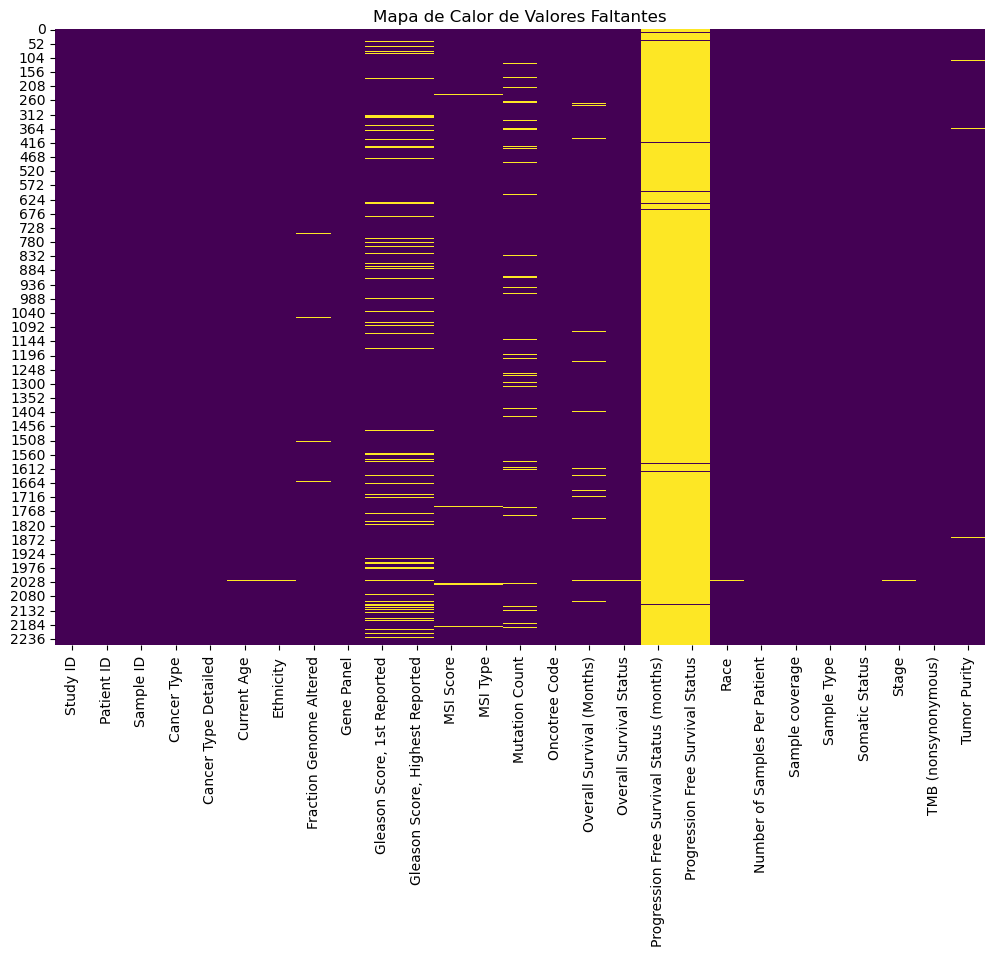

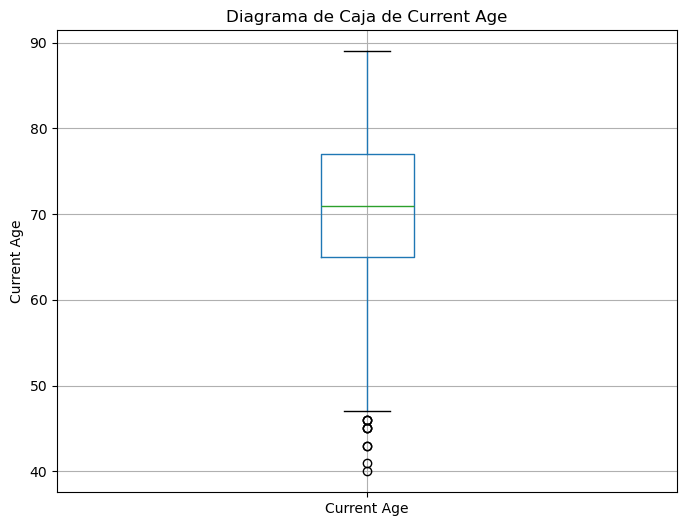

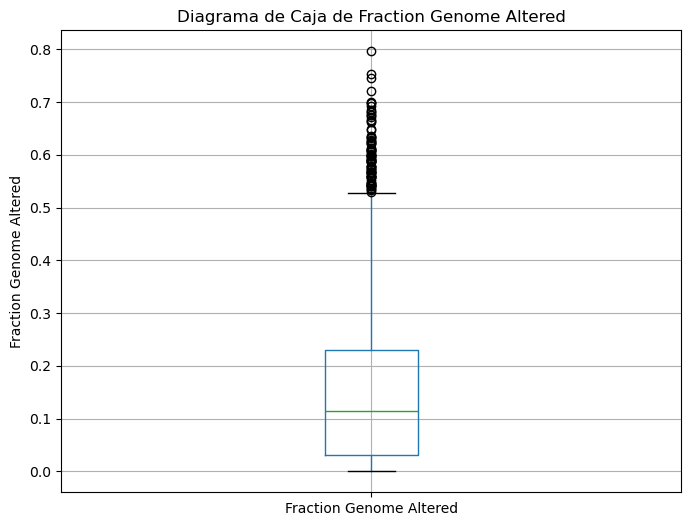

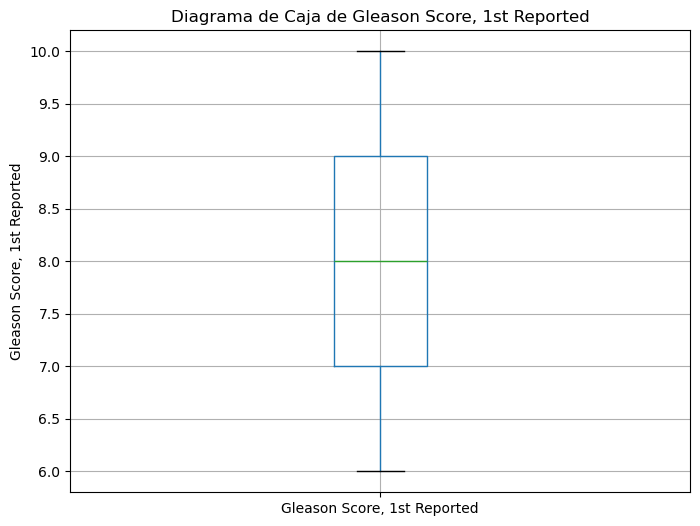

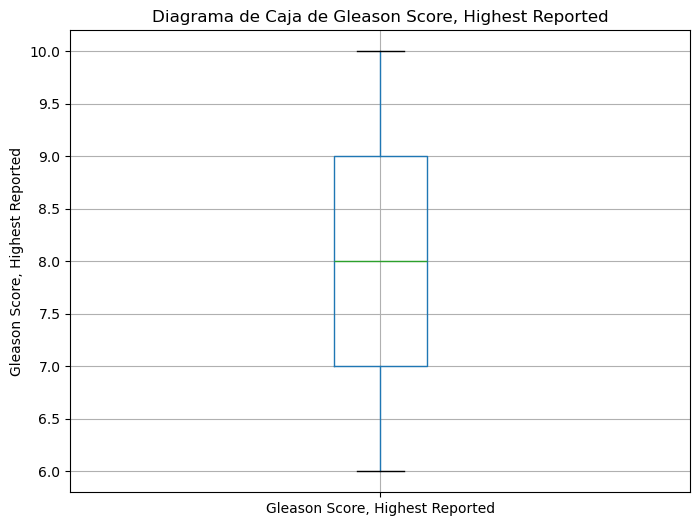

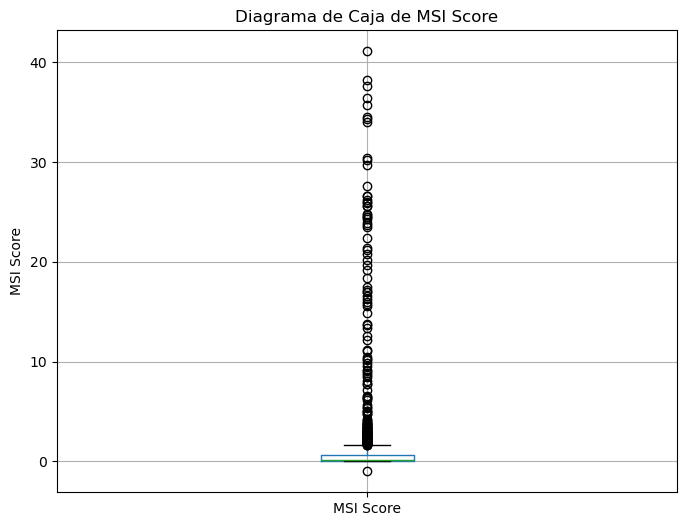

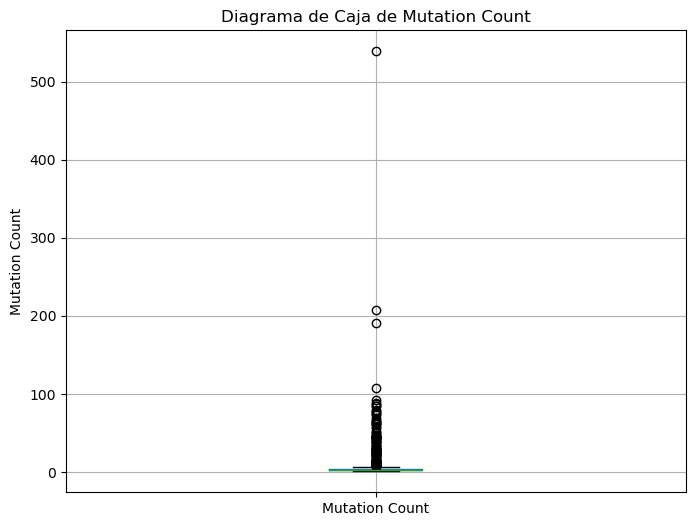

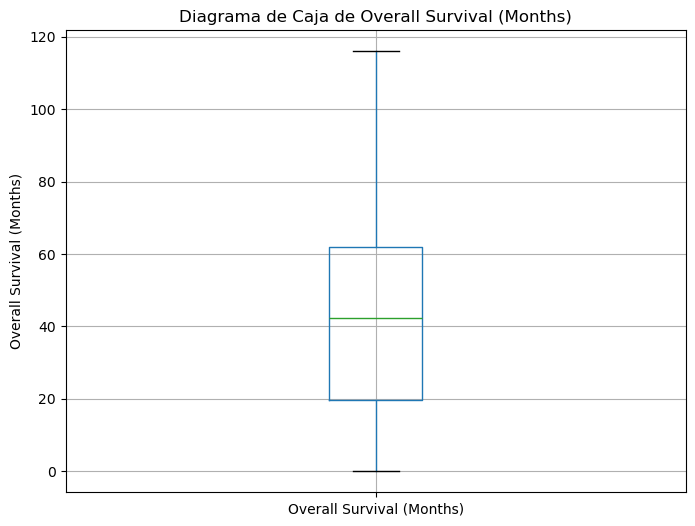

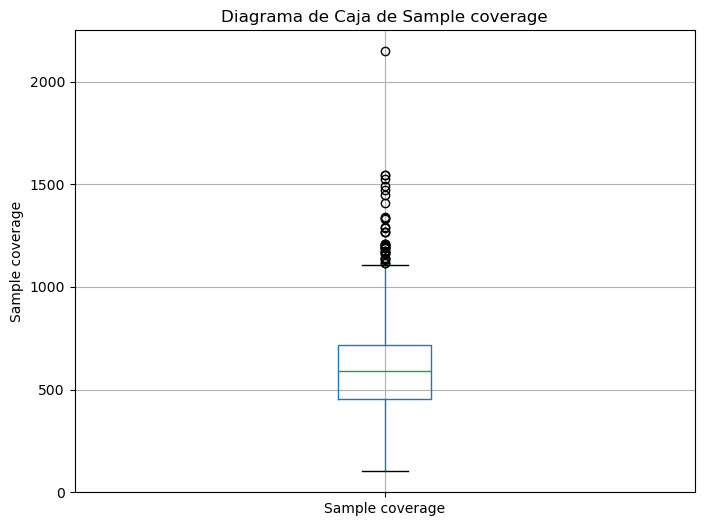

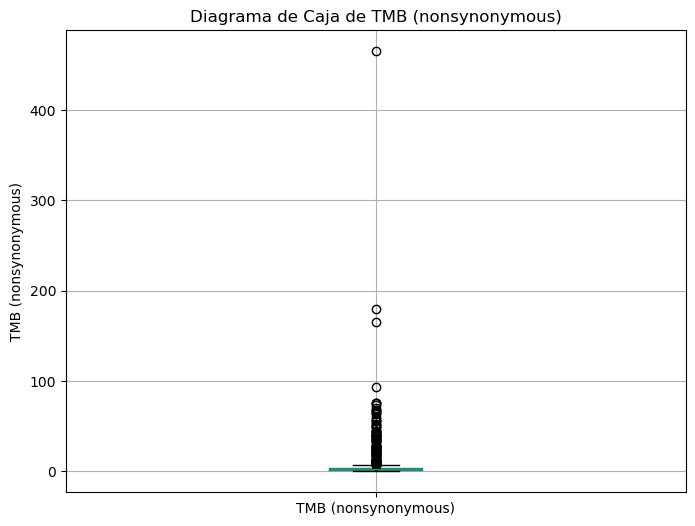

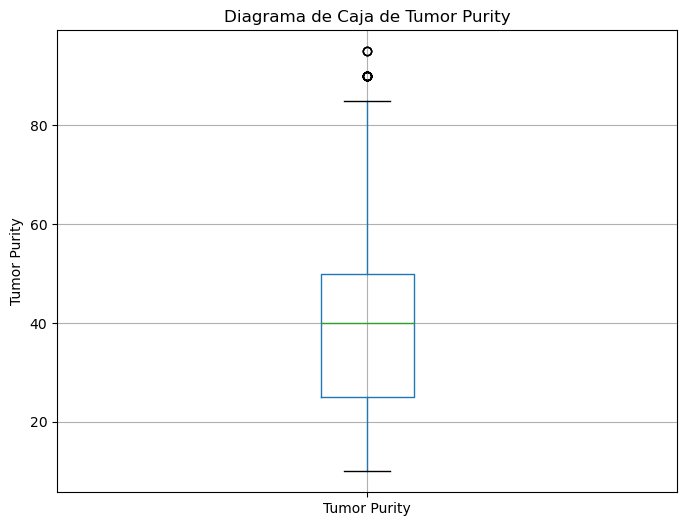

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor de valores faltantes
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de Calor de Valores Faltantes")
plt.show()

# Seleccionar columnas numéricas para diagramas de caja basadas en la salida de describe() y el interés potencial
numerical_cols_for_boxplot = [
    'Current Age',
    'Fraction Genome Altered',
    'Gleason Score, 1st Reported',
    'Gleason Score, Highest Reported',
    'MSI Score',
    'Mutation Count',
    'Overall Survival (Months)',
    'Sample coverage',
    'TMB (nonsynonymous)',
    'Tumor Purity'
]

# Crear diagramas de caja para las columnas numéricas seleccionadas
for col in numerical_cols_for_boxplot:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=col)
    plt.title(f"Diagrama de Caja de {col}")
    plt.ylabel(col)
    plt.show()

## Generación de informe

### Subtarea:
Resumir los hallazgos de la auditoría de calidad de datos en un informe.


**Razonamiento**:
Crear un informe en formato Markdown que resuma los hallazgos clave de los pasos previos de la auditoría de calidad de datos.



In [ ]:
# Generar el informe de auditoría de calidad de datos en formato markdown
report = """
# Informe de Auditoría de Calidad de Datos para el DataFrame `df`

Este informe resume los hallazgos de una auditoría de calidad de datos realizada en el DataFrame `df`.

## 1. Valores Faltantes

Se identificó un número significativo de valores faltantes en varias columnas. El recuento de valores faltantes por columna es el siguiente:
{}

La visualización del mapa de calor ilustró aún más la distribución de estos valores faltantes, mostrando qué columnas tienen la mayor proporción de datos faltantes y si hay algún patrón en la falta de datos. Columnas como 'Progression Free Survival Status (months)' y 'Progression Free Survival Status' tienen un número muy alto de valores faltantes.

## 2. Filas Duplicadas

No se encontraron filas duplicadas en el DataFrame. El recuento de filas duplicadas es: {}

## 3. Tipos de Datos

Los tipos de datos para cada columna parecen ser apropiados para su contenido. Los tipos de datos son los siguientes:
{}

No se identificaron inconsistencias obvias en los tipos de datos basándose en los nombres de las columnas.

## 4. Estadísticas Descriptivas

Las estadísticas descriptivas para las columnas numéricas proporcionaron información sobre la tendencia central, la dispersión y los posibles valores atípicos. Por ejemplo, 'Mutation Count' y 'TMB (nonsynonymous)' muestran un amplio rango de valores y posibles valores atípicos.

Las estadísticas descriptivas para las columnas categóricas destacaron el número de valores únicos y la frecuencia de las categorías más comunes. Columnas como 'Study ID' y 'Cancer Type' tienen muy pocos valores únicos, mientras que las columnas de identificador tienen muchos.

## 5. Valores Únicos

La enumeración de valores únicos en las columnas categóricas reveló las categorías distintas presentes. Este paso confirmó la presencia de valores faltantes (representados como `nan`) en varias columnas categóricas como 'Ethnicity', 'Overall Survival Status' y 'Race'. También se observaron variaciones en el formato de cadena en algunas columnas como 'Race' y 'Ethnicity'.

## 6. Visualizaciones

El mapa de calor de valores faltantes confirmó visualmente las columnas con la mayor cantidad de datos faltantes. Los diagramas de caja para las columnas numéricas seleccionadas ayudaron a visualizar la distribución de los datos e identificar posibles valores atípicos, particularmente en columnas relacionadas con la mutación y la carga tumoral.

## Conclusión

La auditoría de calidad de datos identificó datos faltantes significativos en varias columnas, variaciones en el formato de cadena en algunas columnas categóricas y posibles valores atípicos en características numéricas. No se encontraron filas duplicadas. Estos hallazgos destacan áreas que pueden requerir una limpieza y preprocesamiento adicionales antes de utilizar los datos para análisis o modelado.
""".format(df.isnull().sum().to_string(), df.duplicated().sum(), df.dtypes.to_string())

print(report)


# Informe de Auditoría de Calidad de Datos para el DataFrame `df`

Este informe resume los hallazgos de una auditoría de calidad de datos realizada en el DataFrame `df`.

## 1. Valores Faltantes

Se identificó un número significativo de valores faltantes en varias columnas. El recuento de valores faltantes por columna es el siguiente:
Study ID                                        0
Patient ID                                      0
Sample ID                                       0
Cancer Type                                     0
Cancer Type Detailed                            0
Current Age                                     1
Ethnicity                                       1
Fraction Genome Altered                         7
Gene Panel                                      0
Gleason Score, 1st Reported                   218
Gleason Score, Highest Reported               218
MSI Score                                       9
MSI Type                                        9
Mutation Cou

## Resumen:

### Hallazgos Clave del Análisis de Datos

* Se encontró un número significativo de valores faltantes en varias columnas, con 'Progression Free Survival Status (months)' y 'Progression Free Survival Status' teniendo un recuento muy alto.
* No se identificaron filas duplicadas en el conjunto de datos.
* Los tipos de datos asignados a cada columna parecen apropiados para su contenido.
* Las estadísticas descriptivas revelaron un amplio rango de valores y posibles valores atípicos en columnas numéricas como 'Mutation Count' y 'TMB (nonsynonymous)'.
* El análisis de valores únicos en columnas categóricas confirmó la presencia de valores faltantes (`nan`) y destacó variaciones en el formato de cadena en columnas como 'Race' y 'Ethnicity'.
* Las visualizaciones (mapa de calor y diagramas de caja) respaldaron visualmente los hallazgos relacionados con la distribución de valores faltantes y posibles valores atípicos en las características numéricas.

### Ideas o Próximos Pasos

* Abordar la cantidad significativa de datos faltantes en columnas como 'Progression Free Survival Status (months)' y 'Progression Free Survival Status' mediante imputación o considerando su impacto en análisis posteriores.
* Estandarizar el formato de cadena en columnas categóricas como 'Race' y 'Ethnicity' para asegurar la consistencia en el análisis.

| Column Name                          | Description                                                                                                                                                                                                                            | Ejemplos                                                                 |
|--------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------|
| Study ID                             | Identificador del estudio. Todos los registros parecen pertenecer al mismo estudio.                                                                                                                                                    | prostate_msk_2024                                                        |
| Patient ID                           | Identificador único de cada paciente.                                                                                                                                                                                                  | P-0000140, P-0000197, P-0000318                                         |
| Sample ID                            | Identificador único de cada muestra de tejido tomada de un paciente.                                                                                                                                                                    | P-0000140-T01-IM3, P-0000197-T01-IM3, P-0000318-T01-IM3                  |
| Cancer Type                          | Tipo general de cáncer del paciente.                                                                                                                                                                                                   | Prostate Cancer                                                          |
| Cancer Type Detailed                 | Una subcategorización más específica del tipo de cáncer.                                                                                                                                                                               | Prostate Neuroendocrine Carcinoma, Prostate Adenocarcinoma, Prostate Small Cell Carcinoma |
| Current Age                          | Edad actual del paciente en años.                                                                                                                                                                                                      | 45, 80, 67                                                               |
| Ethnicity                            | Etnicidad declarada del paciente.                                                                                                                                                                                                      | Non-Spanish; Non-Hispanic, Spanish  NOS; Hispanic NOS, Latino NOS, Unknown whether Spanish or not |
| Fraction Genome Altered              | Fracción del genoma que ha sido alterada. Es un valor numérico.                                                                                                                                                                        | 0.5462, 0.0604, 0.5589                                                   |
| Gene Panel                           | Tipo de panel de genes utilizado para la secuenciación.                                                                                                                                                                                | IMPACT341, IMPACT410, IMPACT468, IMPACT505                               |
| Gleason Score, 1st Reported          | Puntuación de Gleason reportada por primera vez. Puede ser 'NA' si no está disponible.                                                                                                                                               | 8, NA, 10, 9                                                             |
| Gleason Score, Highest Reported      | La puntuación de Gleason más alta reportada. Puede ser 'NA' si no está disponible.                                                                                                                                                   | 9, NA, 10, 8                                                             |
| MSI Score                            | Puntuación de inestabilidad de microsatélites (MSI). Un valor numérico que indica el grado de inestabilidad, un factor clave en la respuesta a la inmunoterapia.                                                                     | 0.67, 0.09, 1.67                                                         |
| MSI Type                             | Clasificación de la inestabilidad de microsatélites (MSI), que el estudio asocia con una respuesta más pronunciada y duradera a la inmunoterapia (ICB). Los valores 'Stable' (estable) o 'Instable' (inestable) son cruciales para determinar la estrategia de tratamiento. | Stable, Instable, Indeterminate                                          |
| Mutation Count                       | Número total de mutaciones encontradas. Es un valor entero.                                                                                                                                                                            | 1, 3, NA                                                                 |
| Oncotree Code                        | Código de la clasificación Oncotree para el tipo de cáncer.                                                                                                                                                                          | PRNE, PRAD, PRSCC                                                        |
| Overall Survival (Months)            | Supervivencia general en meses. Es un valor numérico.                                                                                                                                                                                  | 0.32876352, 4.66844199, 1.315054082                                      |
| Overall Survival Status              | Estado de supervivencia del paciente.                                                                                                                                                                                                 | 1:DECEASED, 0:LIVING                                                     |
| Progression Free Survival Status (months) | Estado de supervivencia libre de progresión en meses. Puede ser 'NA' si no está disponible.                                                                                                                                           | NA, 41.97368421, 7.335526316                                              |
| Progression Free Survival Status     | Estado de supervivencia libre de progresión del paciente.                                                                                                                                                                             | NA, 0:DiseaseFree, 1:Recurred/Progressed                                 |
| Race                                 | Raza declarada del paciente.                                                                                                                                                                                                         | WHITE, PATIENT REFUSED TO ANSWER, BLACK OR AFRICAN AMERICAN, ASIAN-FAR EAST/INDIAN SUBCONT |
| Number of Samples Per Patient        | Número de muestras de tejido por paciente.                                                                                                                                                                                             | 1, 2                                                                     |
| Sample coverage                      | Cobertura de la muestra. Es un valor numérico.                                                                                                                                                                                         | 629, 1188, 782                                                           |
| Sample Type                          | Tipo de muestra de tejido.                                                                                                                                                                                                           | Metastasis, Primary                                                      |
| Somatic Status                       | Estado de la muestra somática.                                                                                                                                                                                                         | Matched, Unmatched                                                       |
| Stage                                | Estadio del cáncer del paciente.                                                                                                                                                                                                     | Stage 4, Stage 1-3, Unknown                                              |
| TMB (nonsynonymous)                  | Carga mutacional del tumor (TMB), que según el estudio es mayor en los cánceres MSI-H/dMMR y está directamente relacionada con la respuesta favorable a la inmunoterapia (ICB).                                                           | 1.109155301, 3.327465902, 0                                              |
| Tumor Purity                         | Estimación de la pureza del tumor. Es un valor numérico.                                                                                                                                                                               | 60, 30, 80                                                               |

## Análisis de Outliers

### Subtarea:
Identificar y contar outliers en columnas numéricas usando el método del rango intercuartílico (IQR).

**Razonamiento**:
Recorrer las columnas numéricas, calcular el rango intercuartílico (IQR) e identificar los outliers utilizando el método del IQR. Mostrar el conteo de outliers para cada columna numérica.

In [ ]:
# Identificar columnas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Analizar y contar outliers para cada columna numérica
print("Conteo de Outliers por Columna Numérica (método IQR):")
for col in numerical_cols:
    if col in ['Number of Samples Per Patient']: # Excluir columnas con rangos limitados donde IQR no es informativo
        continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"'{col}': {len(outliers)} outliers")

Conteo de Outliers por Columna Numérica (método IQR):
'Current Age': 10 outliers
'Fraction Genome Altered': 84 outliers
'Gleason Score, 1st Reported': 0 outliers
'Gleason Score, Highest Reported': 0 outliers
'MSI Score': 201 outliers
'Mutation Count': 144 outliers
'Overall Survival (Months)': 0 outliers
'Progression Free Survival Status (months)': 0 outliers
'Sample coverage': 38 outliers
'TMB (nonsynonymous)': 127 outliers
'Tumor Purity': 20 outliers


## Top Columnas por % de Outliers (IQR 1.5x)

### Subtarea:
Calcular el porcentaje de outliers para cada columna numérica utilizando el método IQR (1.5x) e identificar las columnas con el mayor porcentaje.

**Razonamiento**:
Calcular el porcentaje de outliers para cada columna numérica, utilizando los conteos previamente identificados y el número total de filas. Luego, ordenar las columnas según el porcentaje de outliers en orden descendente y mostrar las columnas con mayor proporción.

In [ ]:
# Calcular el porcentaje de outliers para cada columna numérica
outlier_percentages = {}
total_rows = len(df)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    if col in ['Number of Samples Per Patient']: # Excluir columnas con rangos limitados donde IQR no es informativo
        continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    percentage = (outlier_count / total_rows) * 100
    outlier_percentages[col] = percentage

# Ordenar las columnas por porcentaje de outliers en orden descendente
sorted_outliers = sorted(outlier_percentages.items(), key=lambda item: item[1], reverse=True)

# Mostrar las columnas con el porcentaje de outliers
print("Top Columnas por % de Outliers (IQR 1.5x):")
for col, percentage in sorted_outliers:
    print(f"'{col}': {percentage:.2f}%")

Top Columnas por % de Outliers (IQR 1.5x):
'MSI Score': 8.89%
'Mutation Count': 6.37%
'TMB (nonsynonymous)': 5.62%
'Fraction Genome Altered': 3.72%
'Sample coverage': 1.68%
'Tumor Purity': 0.88%
'Current Age': 0.44%
'Gleason Score, 1st Reported': 0.00%
'Gleason Score, Highest Reported': 0.00%
'Overall Survival (Months)': 0.00%
'Progression Free Survival Status (months)': 0.00%


In [ ]:
# Estadísticas de columnas numéricas
print("Estadísticas descriptivas para columnas numéricas:")
display(df.describe().T)

# Generar y mostrar estadísticas descriptivas para columnas categóricas
print("\nEstadísticas Descriptivas para Columnas Categóricas:")
display(df.describe(include='object'))

Estadísticas descriptivas para columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Current Age,2259.0,70.910137,8.911999,40.000000,65.000000,71.000000,77.000000,89.000000
Fraction Genome Altered,2253.0,0.156859,0.155423,0.000000,0.031700,0.114000,0.230900,0.796500
"Gleason Score, 1st Reported",2042.0,7.997551,0.982699,6.000000,7.000000,8.000000,9.000000,10.000000
"Gleason Score, Highest Reported",2042.0,8.141038,0.917301,6.000000,7.000000,8.000000,9.000000,10.000000
MSI Score,2251.0,1.037894,3.724249,-1.000000,0.000000,0.180000,0.660000,41.110000
Mutation Count,2124.0,5.097928,15.899852,1.000000,2.000000,3.000000,4.000000,539.000000
Overall Survival (Months),2204.0,43.269143,27.691354,0.000000,19.660059,42.246112,61.914390,115.987770
Progression Free Survival Status (months),36.0,23.422880,22.270443,0.559211,3.569079,14.407895,42.302632,80.197368
Number of Samples Per Patient,2260.0,1.002655,0.051468,1.000000,1.000000,1.000000,1.000000,2.000000
Sample coverage,2260.0,593.628319,216.858352,102.000000,454.750000,589.000000,716.250000,2148.000000



Estadísticas Descriptivas para Columnas Categóricas:


,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,Ethnicity,Gene Panel,MSI Type,Oncotree Code,Overall Survival Status,Progression Free Survival Status,Race,Sample Type,Somatic Status,Stage
count,2260,2260,2260,2260,2260,2259,2260,2251,2260,2259,36,2259,2260,2260,2259
unique,1,2257,2260,1,4,10,4,4,4,2,2,8,4,2,3
top,prostate_msk_2024,P-0000449,P-0062933-T01-IM7,Prostate Cancer,Prostate Adenocarcinoma,Non-Spanish; Non-Hispanic,IMPACT468,Stable,PRAD,0:LIVING,1:Recurred/Progressed,WHITE,Primary,Matched,Stage 4
freq,2260,2,1,2260,2234,2017,1477,2148,2234,1341,19,1865,1441,2255,1026


Según el contexto de los datos clínicos y el estudio que analizamos, los aspectos más importantes a medir son aquellos que pueden influir en el *tratamiento* y el *pronóstico* del paciente.

---

### Lo más importante a medir

#### 1. Carga mutacional y estado de MSI
La *carga mutacional del tumor (TMB)* y la *inestabilidad de microsatélites (MSI)* son cruciales. El estudio demostró que los pacientes con cáncer de próstata MSI-H/dMMR tienen una mejor respuesta a la *inmunoterapia*. Medir estos marcadores ayuda a los oncólogos a determinar si un paciente es un buen candidato para este tipo de tratamiento, que aprovecha el sistema inmunitario del cuerpo para combatir el cáncer.

#### 2. Supervivencia
Los campos de *supervivencia* son indicadores directos del resultado clínico. Medir la *Supervivencia General (Overall Survival)* y la *Supervivencia Libre de Progresión (Progression Free Survival)* permite evaluar la eficacia de los tratamientos y entender el pronóstico de la enfermedad. Al analizar estos datos en relación con otros factores (como TMB y MSI), se pueden identificar subgrupos de pacientes con mejores o peores resultados.

#### 3. Tipo de cáncer y estado del genoma
El *tipo de cáncer detallado* y la *fracción del genoma alterada* son vitales para entender la naturaleza biológica del tumor. Estos datos pueden revelar si el cáncer es más agresivo, como el carcinoma neuroendocrino de próstata, y ayudan a clasificar a los pacientes con precisión. Por ejemplo, el estudio mostró que los pacientes con MSI-H a menudo tenían una enfermedad más agresiva.

---

### Por qué son importantes en conjunto

Al combinar la información sobre la *carga mutacional* y la *inestabilidad de microsatélites* con los datos de *supervivencia, los investigadores y médicos pueden construir un perfil completo de cada paciente. Esto permite la **medicina de precisión*, donde las decisiones de tratamiento se basan en las características moleculares del tumor, lo que lleva a terapias más efectivas y personalizadas.